<img src="images/sda-title.jpg" alt="Ecomm Data Analysis"> 

[![Environment Setup Video](images/setup-video.jpg)](https://www.youtube.com/watch?v=XG44LZIgcuI "Environment Setup Video")

# Survey Data Analysis
Analyze and Visualize the data collected from a Survey - The StackOverflow Developer Survey 2021. \
We will explore, summarize and visualize the Developer Profile information in the surveyed data. \
This project's Jupyter Notebook can be downloaded for follow-along coding from the Project Portfolio website:
https://d3reelqic2he7d.cloudfront.net
Click on this Project's page and scroll down to the download link at the bottom. This Jupyter Notebook and this video's description has a link to download the StackOverflow Developer Survey 2021 dataset also.

In [1]:
# Check the version of python that we are working on
!python --version

Python 3.8.12


In [2]:
# import the numpy library
import numpy as np
np.__version__
# Note the version of numpy that we are working with

'1.20.3'

In [3]:
# Supress warning messages from the pandas library
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# The above lines may be commented out during testing runs so that you don't miss any warnings

In [4]:
# import the pandas library
import pandas as pd
pd.__version__
# Note the version of pandas that we are working with

'1.4.1'

In [5]:
# import the matplotlib library
from importlib.metadata import version
import matplotlib.pyplot as plt
version('matplotlib')
# Note the version of matplotlib that we are working with

'3.5.1'

In [6]:
# import the seaborn library
import seaborn as sns
sns.__version__
# Note the version of seaborn that we are working with

'0.11.2'

## 1. Read in the Data

## Data Source:
### Thanks Stack Overflow
#### https://insights.stackoverflow.com/survey/

In [7]:
# Read in the survey data file into a pandas dataframe
survey_df = pd.read_csv ('data/survey_results_public.csv')
survey_df
# Note that there are column headings in camel case
# But column headings like MainBranch and YearsCode are not very clear on what data they contain

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [8]:
# Let's check out the dimensions of our survey dataframe
survey_df.shape
# We have over 80,000 rows and 48 columns

(83439, 48)

In [9]:
# Read in the schema data file into a pandas dataframe
schema_df = pd.read_csv ('data/survey_results_schema.csv')
schema_df
# The schema file contains the schematic information linking the questions asked in the survey with 
# the answer data columns in the survey results datset

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [10]:
# Write the schema dataframe to an xls file 
schema_df.to_excel ('data/survey_results_schema.xlsx', index = None, header=True)
# Open a new tab in the chrome browser
# Open file explorer
# Navigate to the folder c:\Users\Administrator\abd-portfolio1\project-6
# click and drag the schema spreadsheet survey_results_schema.xlsx in the new browser tab
# Expand the 'question' and the 'force_resp' columns.

## About the Data
The survey was fielded from May 25 2021, to June 15 2021. \
The survey data file was cleaned by StackOverflow. \
However, we will need to clean the schema file's data

## 2. Data Munging

In [11]:
# We need to reformat the question column in the schema dataframe to a single line of searchable text
# Thanks to StackOverflow and its contributors for this code:
# https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

In [12]:
# import the regex module
import re
TAG_RE = re.compile(r'<[^>]+>')
# compile a regex reference object to identify html tags

In [13]:
# define a function to remove html tags
# it will Replace line breaks and consecutive spaces and new lines with a single space.
# It will also replace &amp; with the '&' symbol.
def remove_tags(text):
    text = text.replace('<br>', ' ')
    
    text = ' '.join(text.split())

    text = text.replace('&amp;', '&')
    
    return TAG_RE.sub('', text)

In [14]:
# Create an empty text variable delimited by triple quotes
text = """\
\
"""
text
# The backslash merely prevents adding new lines between the triple quotes

''

In [15]:
# Test the function with a cell value containing multiple new lines '\n' e.g. row# 1
# From the schema spreadsheet in the adjoining tab, click on the question cell in row# 1.
# Press 'Ctrl'-'A' to copy the contents of the cell and 
# paste it in the code cell between the triple quotes, right before the second backslash.
text = """\
\
"""
text
# Note that the text contains a lot of obfuscating html tags

''

In [16]:
text = """\
"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>

<div> </div>

<div>Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>

<div> </div>

<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying ""This information will be kept private."" </div>

<div> </div>

<div>There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>

<div>   1. Basic Information</div>

<div>   2. Education, Work, and Career</div>

<div>   3. Technology and Tech Culture</div>

<div>   4. Stack Overflow Usage + Community</div>

<div>   5. Demographic Information </div>

<div>   6. Final Questions</div>

<div> 
<div>Most questions in this survey are optional. Required questions are marked with *. This anonymous survey will take about 10 minutes to complete. We encourage you to complete it in one sitting.</div><div><br></div>
</div>

<div><strong>If you use security or ad-blocking plugins, you may see error messages</strong></div>

<div>Our third-party software provider, Qualtrics, does not work well with certain ad blockers and security software. To avoid error messages that prevent you from taking the survey, please try specifically unblocking Qualtrics in your plugin or pausing the plugin while you take the survey. </div>

<div> </div>

<div>To begin, click <strong>Next.</strong></div>"\
"""
text

'"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We\'ll call out each of those in the survey with a note saying ""This information will be kept private."" </div>\n\n<div> </div>\n\n<div>There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div>   1. Basic Information</div>\n\n<div>   2. Education, Work, and Career</div>\n\n<div> 

In [17]:
# run the text through the remove_tags function
remove_tags(text)
# The text is definitely more readble and searchable now

'"Hello world!    Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth.    As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We\'ll call out each of those in the survey with a note saying ""This information will be kept private.""    There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.   1. Basic Information  2. Education, Work, and Career  3. Technology and Tech Culture  4. Stack Overflow Usage + Community  5. Demographic Information   6. Final Questions  Most questions in this survey are optional. Required questions are marked with *. This 

In [18]:
# Create an empty text variable delimited by triple quotes
text = """\
\
"""
text
# The backslash merely prevents adding new lines between the triple quotes

''

In [19]:
# Test the function with a cell value containing embedded html tags and the line break, <br> e.g. row# 47
# From the schema spreadsheet, copy the question cell in row# 47 and paste it to the code cell between the triple quotes
text = """\

\
"""
text
# Note that the text contains html tags including the <br> tag.  

'\n'

In [20]:
text = """\
<span style="font-size:22px;"><strong>Final Questions</strong></span><div><span style="font-family: arial, helvetica, sans-serif; font-size: 16px;"><br></span></div><div><span style="font-family: arial, helvetica, sans-serif; font-size: 16px;">You're almost done!</span></div>\
"""
text

'<span style="font-size:22px;"><strong>Final Questions</strong></span><div><span style="font-family: arial, helvetica, sans-serif; font-size: 16px;"><br></span></div><div><span style="font-family: arial, helvetica, sans-serif; font-size: 16px;">You\'re almost done!</span></div>'

In [21]:
# run the text through the remove_tags function
remove_tags(text)
# A period after 'Questions' would have been perfect, but we can work without it.

"Final Questions You're almost done!"

In [22]:
# Create an empty text variable delimited by triple quotes
text = """\
\
"""
text
# The backslash merely prevents adding new lines between the triple quotes

''

In [23]:
# Test the function with a cell value containing html markup Q&amp; e.g. row# 35
# From the schema spreadsheet, copy the question cell in row# 35 and paste it to the code cell between the triple quotes
text = """\
\
"""
text

''

In [24]:
text = """\
How frequently would you say you participate in Q&amp;A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.\
"""
text
# Note that the Q&amp;A is html for the & symbol

'How frequently would you say you participate in Q&amp;A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [25]:
# run the text through the remove_tags function
remove_tags(text)
# The Q&amp;A has been replaced with Q&A

'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [26]:
# Apply the remove_tags function to the 'question' column in the schema dataframe
schema_df['question'] = schema_df['question'].apply(remove_tags)
schema_df['question'] 
# There seems to be some surlus spaces in the values.

0     Hello world!    Thank you for taking the 2021 ...
1                                     Browser Meta Info
2     Basic Information The first section will focus...
3     Which of the following options best describes ...
4     Which of the following best describes your cur...
5                                  Where do you live? *
6     In which state or territory of the USA do you ...
7     In which part of the United Kingdom do you liv...
8     Education, work, and career This section will ...
9     Which of the following best describes the high...
10    At what age did you write your first line of c...
11    How did you learn to code? Select all that apply.
12    Including any education, how many years have y...
13    NOT including education, how many years have y...
14    Which of the following describes your current ...
15    Approximately how many people are employed by ...
16    Which currency do you use day-to-day? If your ...
17    What is your current total compensation (s

In [27]:
# Apply the remove_tags function AGAIN to the question column in schema dataframe
schema_df['question'] = schema_df['question'].apply(remove_tags)
schema_df['question'] 
# Now the question column seems to be reduced to a single line of text, displayed righ-justified.

0     Hello world! Thank you for taking the 2021 Sta...
1                                     Browser Meta Info
2     Basic Information The first section will focus...
3     Which of the following options best describes ...
4     Which of the following best describes your cur...
5                                  Where do you live? *
6     In which state or territory of the USA do you ...
7     In which part of the United Kingdom do you liv...
8     Education, work, and career This section will ...
9     Which of the following best describes the high...
10    At what age did you write your first line of c...
11    How did you learn to code? Select all that apply.
12    Including any education, how many years have y...
13    NOT including education, how many years have y...
14    Which of the following describes your current ...
15    Approximately how many people are employed by ...
16    Which currency do you use day-to-day? If your ...
17    What is your current total compensation (s

In [28]:
# Checkout the wrangled schema dataframe
schema_df
# Note that the text within the 'question' column is much more readable and searchable

,qid,qname,question,force_resp,type,selector
0,QID16,S0,Hello world! Thank you for taking the 2021 Sta...,False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,Basic Information The first section will focus...,False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,Where do you live? *,True,MC,DL
6,QID7,US_State,In which state or territory of the USA do you ...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"Education, work, and career This section will ...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [29]:
# Close the schema spreadsheet browser tab

In [30]:
# Create a general purpose function to input a search text, 
# Compose a query string, 
# search for the text in the question column of the schema dataframe
# and return the relevant rows 
def look_where(search_str):
    # query string format : 'column-name.str.contains("text-to-search", case=False)'
    qry_str = 'question.str.contains("' + search_str + '", case=False)'
    return schema_df.query(qry_str, engine='python')

## 3. Developer Profile
What we know about the global community of developers

## a) Key territories

In [31]:
# From the dashboard tab of Jupyter Notebook, navigate to the folder: 
# c:/Users/Administrator/abd-porfolio1/project-6/data
# Click on the the so_survey_2021.pdf to open it in another tab of the browser

In [32]:
# Look in the survey pdf page# 3 under Location
# Copy the relevant question "Where do you live?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'Where do you live?'
search_str
# We need to find which column in the results dataset contains the answer

'Where do you live?'

In [33]:
# call the look_where function with the search string
look_where(search_str)
# We need to work with the 'Country' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
5,QID6,Country,Where do you live? *,True,MC,DL


In [34]:
# Extract the Country column in the survey dataframe to a separate series
ctry_ser = survey_df['Country'].copy()
ctry_ser

0                                                 Slovakia
1                                              Netherlands
2                                       Russian Federation
3                                                  Austria
4        United Kingdom of Great Britain and Northern I...
                               ...                        
83434                             United States of America
83435                                                Benin
83436                             United States of America
83437                                               Canada
83438                                               Brazil
Name: Country, Length: 83439, dtype: object

In [35]:
# Create a dataframe with the sorted Value counts in the Country column
territory_df = pd.DataFrame(ctry_ser.value_counts()).reset_index()
territory_df
# We need to fix the column headings

,index,Country
0,United States of America,15288
1,India,10511
2,Germany,5625
3,United Kingdom of Great Britain and Northern I...,4475
4,Canada,3012
...,...,...
176,Saint Kitts and Nevis,1
177,Dominica,1
178,Saint Vincent and the Grenadines,1
179,Tuvalu,1


In [36]:
# Rename the columns of the territory dataframe
territory_df.columns = ['Country', 'Responses']
territory_df

,Country,Responses
0,United States of America,15288
1,India,10511
2,Germany,5625
3,United Kingdom of Great Britain and Northern I...,4475
4,Canada,3012
...,...,...
176,Saint Kitts and Nevis,1
177,Dominica,1
178,Saint Vincent and the Grenadines,1
179,Tuvalu,1


In [37]:
# Add a percentage column to the territory dataframe
territory_df['Percentage'] = np.round(territory_df.Responses / sum(territory_df.Responses) * 100, 2)
territory_df

,Country,Responses,Percentage
0,United States of America,15288,18.32
1,India,10511,12.60
2,Germany,5625,6.74
3,United Kingdom of Great Britain and Northern I...,4475,5.36
4,Canada,3012,3.61
...,...,...,...
176,Saint Kitts and Nevis,1,0.00
177,Dominica,1,0.00
178,Saint Vincent and the Grenadines,1,0.00
179,Tuvalu,1,0.00


In [38]:
# List out the top 10 countries represented in the survey
territory_df.head(10)
# Many respondents are from the US, India and Germany.

,Country,Responses,Percentage
0,United States of America,15288,18.32
1,India,10511,12.60
2,Germany,5625,6.74
3,United Kingdom of Great Britain and Northern I...,4475,5.36
4,Canada,3012,3.61
5,France,2708,3.25
6,Brazil,2254,2.70
7,Poland,1805,2.16
8,Netherlands,1772,2.12
9,Italy,1666,2.00


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#key-territories-country" target = "_blank">here</a> to verify with StackOverflow

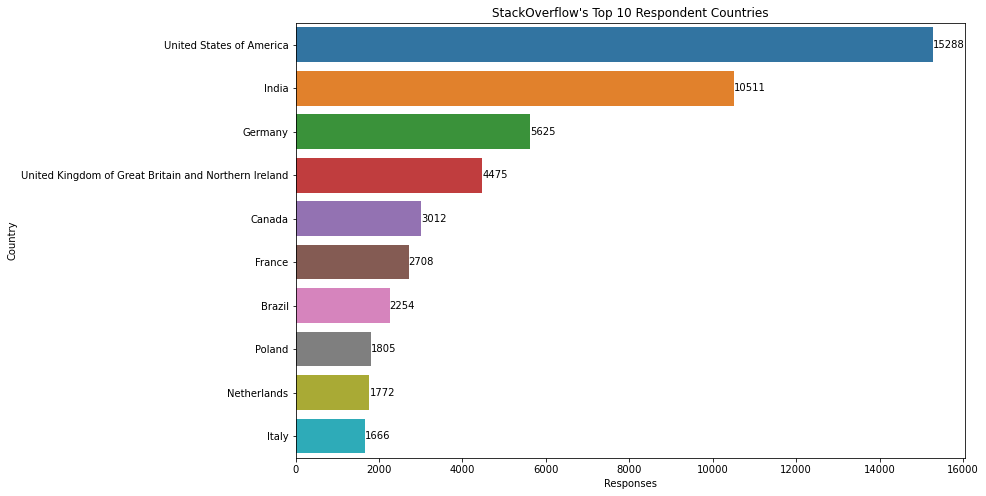

In [39]:
# Draw a horizontal bar chart of the top 10 countries represented in the survey by responses
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=territory_df.head(10), x='Responses', y='Country')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow's Top 10 Respondent Countries");
# The for loop displays the numbers for each bar in the graph.

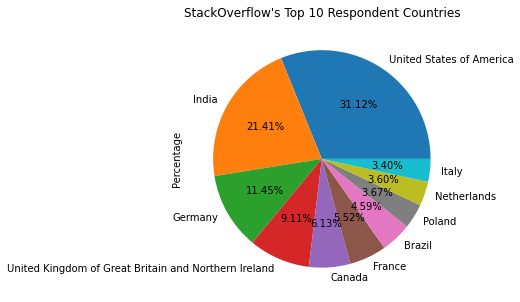

In [40]:
# Draw a pie chart of the top 10 countries represented in the survey by percentages
trtry_pie_df = territory_df.head(10).set_index('Country')
trtry_pie_df.plot.pie(figsize=(8, 5), y='Percentage', autopct='%.2f%%', legend=False)
plt.title("StackOverflow's Top 10 Respondent Countries");
# The parameter autopct shows the % for each piece of the pie

### States within the United States

In [41]:
# What is the response representation among the states within the United States?
# Look in the survey pdf page# 3 under Location
# Copy the relevant question "In which state or territory of the USA do you live?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'In which state or territory of the USA do you live?'
search_str
# We need to find which column in the results dataset contains the answer

'In which state or territory of the USA do you live?'

In [42]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'US_State' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
6,QID7,US_State,In which state or territory of the USA do you ...,False,MC,DL


In [43]:
# Extract the Country column in the survey dataframe to a separate series
us_ser = survey_df['US_State'].dropna().copy()
us_ser
# Since this question is not force-response True, meaning optional answer, we dropped rows with invalid responses

5                     Georgia
6               New Hampshire
15                   Missouri
36       District of Columbia
37              Massachusetts
                 ...         
83427            Pennsylvania
83429              Washington
83430                Illinois
83434                   Texas
83436              New Jersey
Name: US_State, Length: 14920, dtype: object

In [44]:
# Create a dataframe with the sorted Value counts in the US_State column
us_df = pd.DataFrame(us_ser.value_counts()).reset_index()
us_df
# We need to fix the column headings

,index,US_State
0,California,2163
1,Texas,1023
2,New York,961
3,Washington,932
4,Massachusetts,624
5,Florida,613
6,Illinois,587
7,Colorado,549
8,Pennsylvania,499
9,Virginia,453


In [45]:
# Rename the columns of the us dataframe
us_df.columns = ['US_State', 'Responses']
us_df

,US_State,Responses
0,California,2163
1,Texas,1023
2,New York,961
3,Washington,932
4,Massachusetts,624
5,Florida,613
6,Illinois,587
7,Colorado,549
8,Pennsylvania,499
9,Virginia,453


In [46]:
# Add a percentage column to the US dataframe
us_df['Percentage'] = np.round(us_df.Responses / sum(us_df.Responses) * 100, 2)
us_df
# The top states contributing respondents are the 4 border states of California, Texas, New York and Washington

,US_State,Responses,Percentage
0,California,2163,14.50
1,Texas,1023,6.86
2,New York,961,6.44
3,Washington,932,6.25
4,Massachusetts,624,4.18
5,Florida,613,4.11
6,Illinois,587,3.93
7,Colorado,549,3.68
8,Pennsylvania,499,3.34
9,Virginia,453,3.04


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#key-territories-country-us" target = "_blank">here</a> to verify with StackOverflow

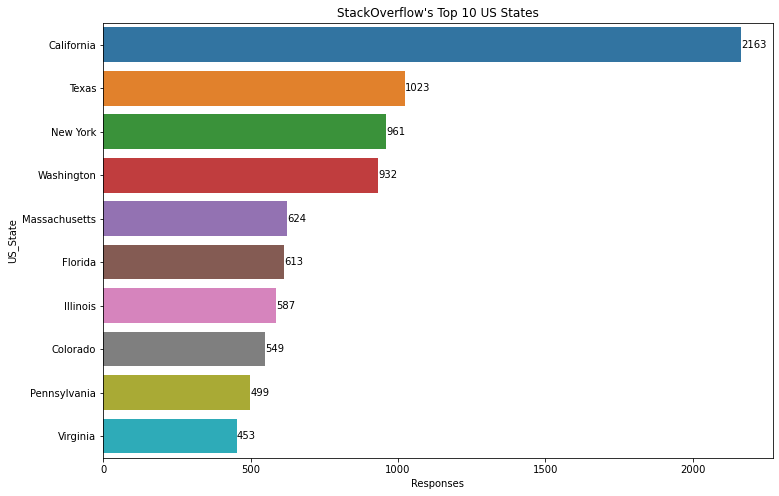

In [47]:
# Draw a horizontal bar chart of the top 10 countries represented in the survey by responses
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=us_df.head(10), x='Responses', y='US_State')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow's Top 10 US States");
# The Californian Silicon valley is living up to its name!

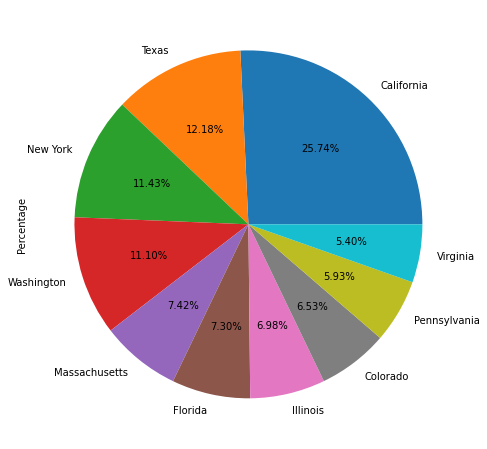

In [48]:
# Draw a pie chart of the top 10 countries represented in the survey by percentages
us_pie_df = us_df.head(10).set_index('US_State')
us_pie_df.plot.pie(figsize=(8, 8), y='Percentage', autopct='%.2f%%', legend=False);
# Note that the percentages show share within the top 10 countries, adding upto 100%

## b) Experience

#### Writing that first line of code

In [49]:
# Look in the survey pdf page# 4 under Education, work, and career
# Copy the relevant question "At what age did you write your first line of code or program?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'At what age did you write your first line of code or program?'
search_str
# We need to find which column in the results dataset contains the answer

'At what age did you write your first line of code or program?'

In [50]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'Age1stCode' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
10,QID149,Age1stCode,At what age did you write your first line of c...,False,MC,MAVR


In [51]:
# Extract the Age1stCode column in the survey dataframe to a separate series
age1st_ser = survey_df['Age1stCode'].dropna().copy()
age1st_ser
# Since this question is not force-response True, meaning optional answer, we dropped rows with invalid responses

0        18 - 24 years
1        11 - 17 years
2        11 - 17 years
3        11 - 17 years
4         5 - 10 years
             ...      
83434    11 - 17 years
83435    11 - 17 years
83436    11 - 17 years
83437    11 - 17 years
83438    11 - 17 years
Name: Age1stCode, Length: 83243, dtype: object

In [52]:
# Create a dataframe with the sorted Value counts in the Age1stCode column
age1st_df = pd.DataFrame(age1st_ser.value_counts()).reset_index()
age1st_df
# We need to fix the column headings

,index,Age1stCode
0,11 - 17 years,44170
1,18 - 24 years,20065
2,5 - 10 years,11720
3,25 - 34 years,4199
4,35 - 44 years,1312
5,Younger than 5 years,905
6,45 - 54 years,544
7,55 - 64 years,245
8,Older than 64 years,83


In [53]:
# Rename the columns of the age1st dataframe
age1st_df.columns = ['Age1stCode', 'Responses']
age1st_df
# A shoutout to the repondents over 64 years! Age is NO object!!

,Age1stCode,Responses
0,11 - 17 years,44170
1,18 - 24 years,20065
2,5 - 10 years,11720
3,25 - 34 years,4199
4,35 - 44 years,1312
5,Younger than 5 years,905
6,45 - 54 years,544
7,55 - 64 years,245
8,Older than 64 years,83


In [54]:
# Add a percentage column to the age1st dataframe
age1st_df['Percentage'] = round(age1st_df.Responses / sum(age1st_df.Responses) * 100, 2)
age1st_df

,Age1stCode,Responses,Percentage
0,11 - 17 years,44170,53.06
1,18 - 24 years,20065,24.10
2,5 - 10 years,11720,14.08
3,25 - 34 years,4199,5.04
4,35 - 44 years,1312,1.58
5,Younger than 5 years,905,1.09
6,45 - 54 years,544,0.65
7,55 - 64 years,245,0.29
8,Older than 64 years,83,0.10


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#developer-profile-experience" target = "_blank">here</a> to verify with StackOverflow

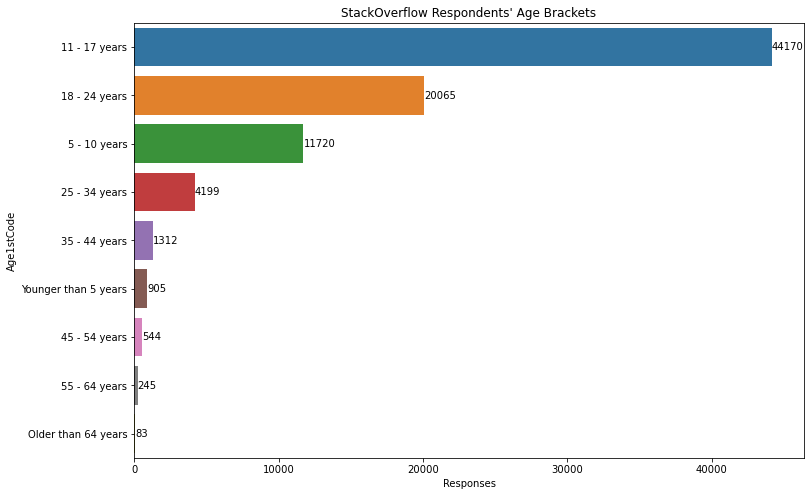

In [55]:
# Draw a horizontal bar chart of the age1st code represented in the survey by responses
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age1st_df.head(10), x='Responses', y='Age1stCode')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondents' Age Brackets");

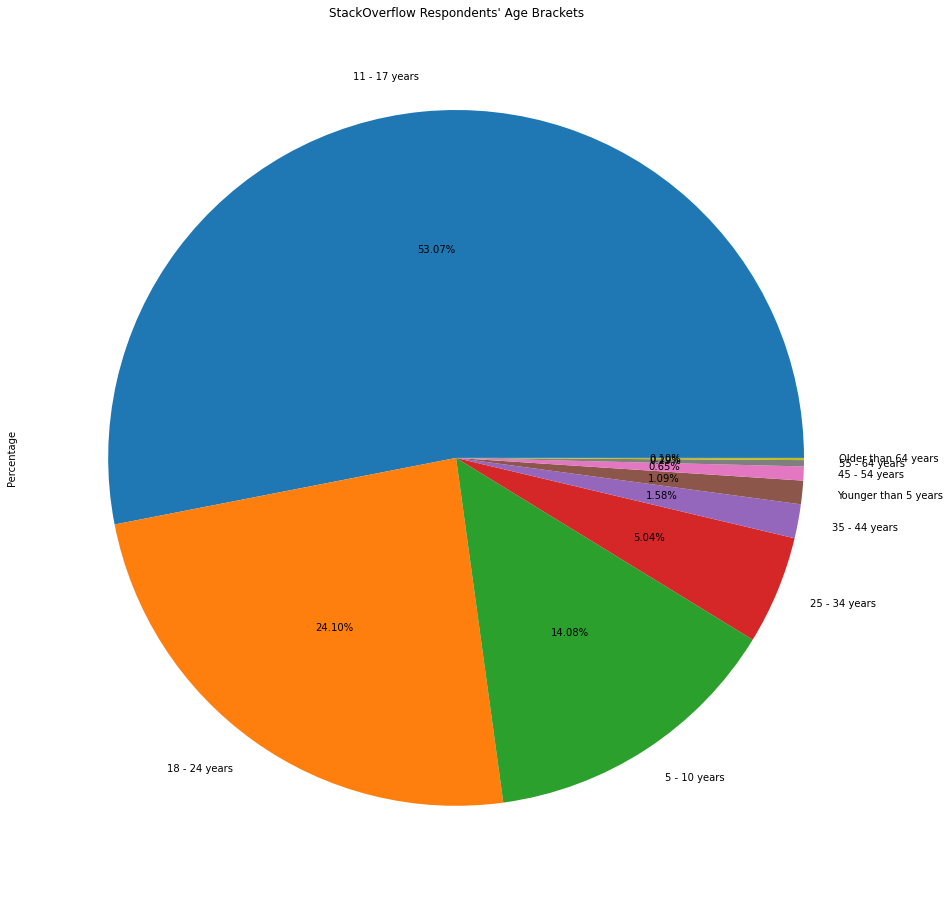

In [56]:
# Draw a pie chart of the top age1st code represented in the survey by percentages
age1st_pie_df = age1st_df.head(10).set_index('Age1stCode')
age1st_pie_df.plot.pie(figsize=(16, 16), y='Percentage', autopct='%.2f%%', legend=False);
plt.title("StackOverflow Respondents' Age Brackets");

#### Learning how to code

In [57]:
# Look in the survey pdf page# 4 under Education, work, and career
# Copy the relevant question "How did you learn to code?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'How did you learn to code?'
search_str
# We need to find which column in the results dataset contains the answer

'How did you learn to code?'

In [58]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'LearnCode' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
11,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


In [59]:
# We also need the current age of the respondents to understand generation-wise learning methods
# Look in the survey pdf page# 18 under Demographics
# Copy the relevant question "What is your age?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'What is your age?'
search_str
# We need to find which column in the results dataset contains the answer

'What is your age?'

In [60]:
# call the look_where function with the search string 
look_where(search_str)
# We also need to work with the 'Age' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
38,QID127,Age,What is your age?,False,MC,MAVR


In [61]:
# Extract the Age and LearnCode column in the survey dataframe to a separate dataframe
learn_df = survey_df[['Age','LearnCode']].copy()
learn_df.dropna(subset = ['LearnCode'], inplace=True)
learn_df
# Since this question is not force-response True, we dropped rows with invalid responses in LearnCode column

,Age,LearnCode
0,25-34 years old,Coding Bootcamp;Other online resources (ex: vi...
1,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
2,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
4,25-34 years old,Friend or family member
5,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
...,...,...
83434,25-34 years old,"Other online resources (ex: videos, blogs, etc..."
83435,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
83436,25-34 years old,School
83437,25-34 years old,Online Courses or Certification;Books / Physic...


In [62]:
# Save the number of 'learn to code' respondents 
learnCode_responses = learn_df.shape[0]
learnCode_responses

82963

In [63]:
# Check the age breakups
learn_df.Age.value_counts(dropna=False)
# Note the 922 null values for age

25-34 years old       32427
18-24 years old       20904
35-44 years old       15117
45-54 years old        5452
Under 18 years old     5341
55-64 years old        1815
NaN                     922
Prefer not to say       566
65 years or older       419
Name: Age, dtype: int64

In [64]:
# let us assign the value 'Prefer not to say' to the null age values
learn_df['Age'].fillna('Prefer not to say', inplace = True)
learn_df

,Age,LearnCode
0,25-34 years old,Coding Bootcamp;Other online resources (ex: vi...
1,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
2,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
4,25-34 years old,Friend or family member
5,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
...,...,...
83434,25-34 years old,"Other online resources (ex: videos, blogs, etc..."
83435,18-24 years old,"Other online resources (ex: videos, blogs, etc..."
83436,25-34 years old,School
83437,25-34 years old,Online Courses or Certification;Books / Physic...


In [65]:
# Check the age breakups
learn_df.Age.value_counts(dropna=False)
# Note that the 922 null ages added to the 566 'Prefer not to say' values

25-34 years old       32427
18-24 years old       20904
35-44 years old       15117
45-54 years old        5452
Under 18 years old     5341
55-64 years old        1815
Prefer not to say      1488
65 years or older       419
Name: Age, dtype: int64

In [66]:
# Check the LearnCode breakups
learn_df.LearnCode.value_counts()
# Note that there are multiple learning methods in a row delimited by semicolons  

School                                                                                                                          7242
Other online resources (ex: videos, blogs, etc)                                                                                 3502
Books / Physical media                                                                                                          3357
School;Books / Physical media                                                                                                   3136
Other online resources (ex: videos, blogs, etc);School;Books / Physical media                                                   2441
                                                                                                                                ... 
Coding Bootcamp;School;Online Forum;Friend or family member;Colleague;Books / Physical media                                       1
Coding Bootcamp;Online Forum;Online Courses or Certification;Other (p

In [67]:
# Explode the learnCode column values to multiple rows splitting on semicolons
all_learn_df = (learn_df.set_index(['Age'])
            .apply(lambda x: x.str.split(';').explode())
            .reset_index()).copy() 
all_learn_df
# To protect the other column from the apply function, we convert it to index and subsequently restore it as a column

,Age,LearnCode
0,25-34 years old,Coding Bootcamp
1,25-34 years old,"Other online resources (ex: videos, blogs, etc)"
2,18-24 years old,"Other online resources (ex: videos, blogs, etc)"
3,18-24 years old,School
4,18-24 years old,"Other online resources (ex: videos, blogs, etc)"
...,...,...
241148,18-24 years old,Books / Physical media
241149,25-34 years old,School
241150,25-34 years old,Online Courses or Certification
241151,25-34 years old,Books / Physical media


In [68]:
# Check the LearnCode breakups
all_learn_df.LearnCode.value_counts()
# Note that the LearnCode value 'Other (please specify):' does not make sense

Other online resources (ex: videos, blogs, etc)    49392
School                                             44462
Books / Physical media                             42752
Online Courses or Certification                    33511
Online Forum                                       26229
Friend or family member                            15162
Colleague                                          14225
Coding Bootcamp                                     8496
Other (please specify):                             6924
Name: LearnCode, dtype: int64

In [69]:
# Delete the rows with LearnCode value 'Other (please specify):'
all_learn_df = all_learn_df[all_learn_df.LearnCode != 'Other (please specify):'].copy()
all_learn_df

,Age,LearnCode
0,25-34 years old,Coding Bootcamp
1,25-34 years old,"Other online resources (ex: videos, blogs, etc)"
2,18-24 years old,"Other online resources (ex: videos, blogs, etc)"
3,18-24 years old,School
4,18-24 years old,"Other online resources (ex: videos, blogs, etc)"
...,...,...
241148,18-24 years old,Books / Physical media
241149,25-34 years old,School
241150,25-34 years old,Online Courses or Certification
241151,25-34 years old,Books / Physical media


In [70]:
# Extract the LearnCode column in the all_learn dataframe to a separate series
LearnCode_ser = all_learn_df['LearnCode'].copy()
LearnCode_ser

0                                         Coding Bootcamp
1         Other online resources (ex: videos, blogs, etc)
2         Other online resources (ex: videos, blogs, etc)
3                                                  School
4         Other online resources (ex: videos, blogs, etc)
                               ...                       
241148                             Books / Physical media
241149                                             School
241150                    Online Courses or Certification
241151                             Books / Physical media
241152                                             School
Name: LearnCode, Length: 234229, dtype: object

In [71]:
# Create a dataframe with the sorted Value counts in the LearnCode column
LearnCode_df = pd.DataFrame(LearnCode_ser.value_counts()).reset_index()
LearnCode_df
# We need to fix the column headings

,index,LearnCode
0,"Other online resources (ex: videos, blogs, etc)",49392
1,School,44462
2,Books / Physical media,42752
3,Online Courses or Certification,33511
4,Online Forum,26229
5,Friend or family member,15162
6,Colleague,14225
7,Coding Bootcamp,8496


In [72]:
# Rename the columns of the LearnCode dataframe
LearnCode_df.columns = ['LearnCode', 'Responses']
LearnCode_df

,LearnCode,Responses
0,"Other online resources (ex: videos, blogs, etc)",49392
1,School,44462
2,Books / Physical media,42752
3,Online Courses or Certification,33511
4,Online Forum,26229
5,Friend or family member,15162
6,Colleague,14225
7,Coding Bootcamp,8496


In [73]:
# Add a percentage column to the LearnCode dataframe
LearnCode_df['Percentage'] = round(LearnCode_df.Responses / learnCode_responses * 100, 2)
LearnCode_df
# LearnCode is split almost evenly between Online resources and School and Physical media

,LearnCode,Responses,Percentage
0,"Other online resources (ex: videos, blogs, etc)",49392,59.53
1,School,44462,53.59
2,Books / Physical media,42752,51.53
3,Online Courses or Certification,33511,40.39
4,Online Forum,26229,31.62
5,Friend or family member,15162,18.28
6,Colleague,14225,17.15
7,Coding Bootcamp,8496,10.24


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#experience-learn-code" target = "_blank">here</a> to verify with StackOverflow

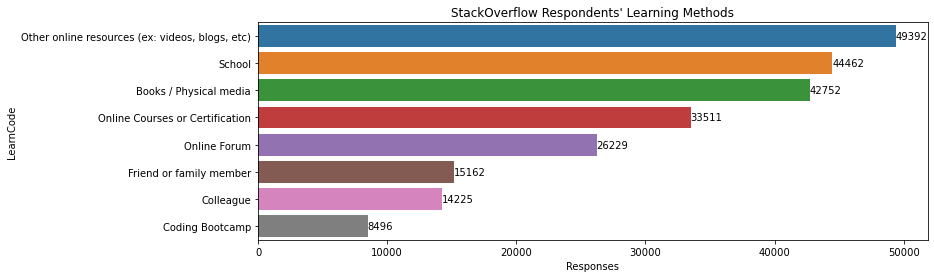

In [74]:
# Draw a horizontal bar chart of the LearnCode represented in the survey by responses
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=LearnCode_df.head(10), x='Responses', y='LearnCode')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondents' Learning Methods");

In [75]:
# Group by Age and sum the LearnCode types for each Age group
all_learn_df.groupby('Age').LearnCode.value_counts()

Age                 LearnCode                                      
18-24 years old     Other online resources (ex: videos, blogs, etc)    14639
                    School                                             11765
                    Online Courses or Certification                     9814
                    Books / Physical media                              7997
                    Online Forum                                        7240
                                                                       ...  
Under 18 years old  Books / Physical media                              1762
                    School                                              1563
                    Friend or family member                             1243
                    Coding Bootcamp                                      630
                    Colleague                                            117
Name: LearnCode, Length: 64, dtype: int64

In [76]:
# Create a dataframe with the age group wise subtotals of the various LearnCodes
age_learn_df = pd.DataFrame(all_learn_df.groupby('Age').LearnCode.value_counts())
age_learn_df
# The age_learn dataframe has age and learnCode as double indexes

LearnCode
Age                LearnCode                                                 
18-24 years old    Other online resources (ex: videos, blogs, etc)      14639
                   School                                               11765
                   Online Courses or Certification                       9814
                   Books / Physical media                                7997
                   Online Forum                                          7240
...                                                                       ...
Under 18 years old Books / Physical media                                1762
                   School                                                1563
                   Friend or family member                               1243
                   Coding Bootcamp                                        630
                   Colleague                                              117

[64 rows x 1 columns]

In [77]:
# Rename the LearnCode column to Responses
age_learn_df.columns=['Responses']
age_learn_df.reset_index(inplace=True)
age_learn_df
# The index has been reset to running numbers

,Age,LearnCode,Responses
0,18-24 years old,"Other online resources (ex: videos, blogs, etc)",14639
1,18-24 years old,School,11765
2,18-24 years old,Online Courses or Certification,9814
3,18-24 years old,Books / Physical media,7997
4,18-24 years old,Online Forum,7240
...,...,...,...
59,Under 18 years old,Books / Physical media,1762
60,Under 18 years old,School,1563
61,Under 18 years old,Friend or family member,1243
62,Under 18 years old,Coding Bootcamp,630


In [78]:
# Create a pivot table indexed on Age grup and columns showing subtotals of the various LearnCodes 
age_learn_pt = age_learn_df.pivot(index='Age', columns='LearnCode', values='Responses')
age_learn_pt
# Note that the rows are sorted in the order of ascending Age labels

LearnCode,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Online Courses or Certification,Online Forum,"Other online resources (ex: videos, blogs, etc)",School
Age,,,,,,,,
18-24 years old,7997,2549,2904,3674,9814,7240,14639,11765
25-34 years old,15818,3553,6727,5470,13915,10838,19803,18478
35-44 years old,10427,1146,2977,3244,5083,4285,7411,8220
45-54 years old,4372,352,956,1002,1456,1229,1994,2592
55-64 years old,1387,87,283,200,410,324,538,952
65 years or older,257,22,70,35,64,50,100,218
Prefer not to say,732,157,191,294,557,446,801,674
Under 18 years old,1762,630,117,1243,2212,1817,4106,1563


In [79]:
# make Age a column in the age_learn pivot tabl
age_learn_pt.reset_index(inplace=True)
age_learn_pt

LearnCode,Age,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Online Courses or Certification,Online Forum,"Other online resources (ex: videos, blogs, etc)",School
0,18-24 years old,7997,2549,2904,3674,9814,7240,14639,11765
1,25-34 years old,15818,3553,6727,5470,13915,10838,19803,18478
2,35-44 years old,10427,1146,2977,3244,5083,4285,7411,8220
3,45-54 years old,4372,352,956,1002,1456,1229,1994,2592
4,55-64 years old,1387,87,283,200,410,324,538,952
5,65 years or older,257,22,70,35,64,50,100,218
6,Prefer not to say,732,157,191,294,557,446,801,674
7,Under 18 years old,1762,630,117,1243,2212,1817,4106,1563


In [80]:
# Replace 'Under 18 years old' with '1-17 years old'
age_learn_pt.loc[7,'Age'] = '01-17 years old'
age_learn_pt.sort_values('Age', inplace=True)
age_learn_pt
# we have sorted on the Age column

LearnCode,Age,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Online Courses or Certification,Online Forum,"Other online resources (ex: videos, blogs, etc)",School
7,01-17 years old,1762,630,117,1243,2212,1817,4106,1563
0,18-24 years old,7997,2549,2904,3674,9814,7240,14639,11765
1,25-34 years old,15818,3553,6727,5470,13915,10838,19803,18478
2,35-44 years old,10427,1146,2977,3244,5083,4285,7411,8220
3,45-54 years old,4372,352,956,1002,1456,1229,1994,2592
4,55-64 years old,1387,87,283,200,410,324,538,952
5,65 years or older,257,22,70,35,64,50,100,218
6,Prefer not to say,732,157,191,294,557,446,801,674


In [81]:
# make Age the index again
age_learn_pt.set_index('Age', inplace=True)
age_learn_pt
# Now the pivot table is sorted and indexed on Age

LearnCode,Books / Physical media,Coding Bootcamp,Colleague,Friend or family member,Online Courses or Certification,Online Forum,"Other online resources (ex: videos, blogs, etc)",School
Age,,,,,,,,
01-17 years old,1762,630,117,1243,2212,1817,4106,1563
18-24 years old,7997,2549,2904,3674,9814,7240,14639,11765
25-34 years old,15818,3553,6727,5470,13915,10838,19803,18478
35-44 years old,10427,1146,2977,3244,5083,4285,7411,8220
45-54 years old,4372,352,956,1002,1456,1229,1994,2592
55-64 years old,1387,87,283,200,410,324,538,952
65 years or older,257,22,70,35,64,50,100,218
Prefer not to say,732,157,191,294,557,446,801,674


In [87]:
# Extract the pivot table's  column names to a list
cols = age_learn_pt.columns.tolist()
cols

['Books / Physical media',
 'Coding Bootcamp',
 'Colleague',
 'Friend or family member',
 'Online Courses or Certification',
 'Online Forum',
 'Other online resources (ex: videos, blogs, etc)',
 'School']

In [88]:
# Reorder the column names per StackOverflow's Results page
cols = [
    'Other online resources (ex: videos, blogs, etc)',
    'School',
    'Books / Physical media',
    'Online Courses or Certification',
    'Online Forum',
    'Friend or family member',
    'Colleague',
    'Coding Bootcamp'
]
cols

['Other online resources (ex: videos, blogs, etc)',
 'School',
 'Books / Physical media',
 'Online Courses or Certification',
 'Online Forum',
 'Friend or family member',
 'Colleague',
 'Coding Bootcamp']

In [89]:
# Reorder the pivot table's  columns per StackOverflow's Results page
age_learn_pt = age_learn_pt[cols].copy()
age_learn_pt

LearnCode,"Other online resources (ex: videos, blogs, etc)",School,Books / Physical media,Online Courses or Certification,Online Forum,Friend or family member,Colleague,Coding Bootcamp
Age,,,,,,,,
01-17 years old,4106,1563,1762,2212,1817,1243,117,630
18-24 years old,14639,11765,7997,9814,7240,3674,2904,2549
25-34 years old,19803,18478,15818,13915,10838,5470,6727,3553
35-44 years old,7411,8220,10427,5083,4285,3244,2977,1146
45-54 years old,1994,2592,4372,1456,1229,1002,956,352
55-64 years old,538,952,1387,410,324,200,283,87
65 years or older,100,218,257,64,50,35,70,22
Prefer not to say,801,674,732,557,446,294,191,157


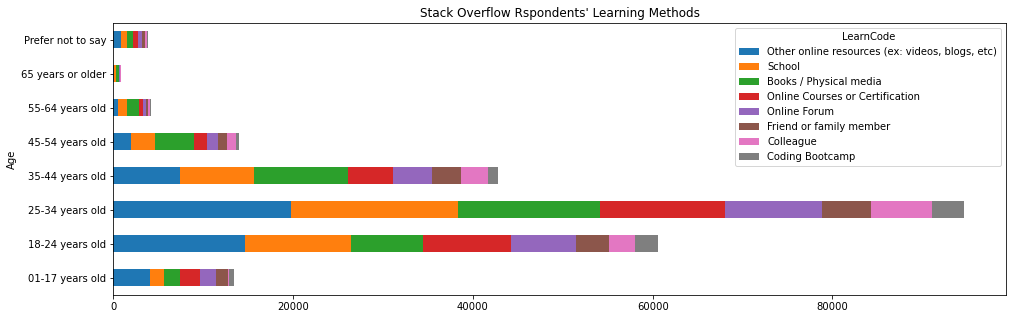

In [90]:
# Draw a horizontal bar graph showing the breakup of the LearnCodes across all the age groups 
age_learn_pt.plot.barh(stacked=True, figsize=(16,5))
plt.title("Stack Overflow Rspondents' Learning Methods");

In [91]:
# Normalize the age_learn pivot table by dividing each cell by row total
page_learn_pt = round((age_learn_pt.div(age_learn_pt.sum(axis=1), axis=0)) * 100, 2).copy()
page_learn_pt

LearnCode,"Other online resources (ex: videos, blogs, etc)",School,Books / Physical media,Online Courses or Certification,Online Forum,Friend or family member,Colleague,Coding Bootcamp
Age,,,,,,,,
01-17 years old,30.53,11.62,13.10,16.45,13.51,9.24,0.87,4.68
18-24 years old,24.16,19.42,13.20,16.20,11.95,6.06,4.79,4.21
25-34 years old,20.93,19.53,16.72,14.71,11.46,5.78,7.11,3.76
35-44 years old,17.32,19.21,24.37,11.88,10.01,7.58,6.96,2.68
45-54 years old,14.29,18.58,31.33,10.44,8.81,7.18,6.85,2.52
55-64 years old,12.87,22.77,33.17,9.81,7.75,4.78,6.77,2.08
65 years or older,12.25,26.72,31.50,7.84,6.13,4.29,8.58,2.70
Prefer not to say,20.79,17.50,19.00,14.46,11.58,7.63,4.96,4.08


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#experience-learn-code-age" target = "_blank">here</a> to verify with StackOverflow

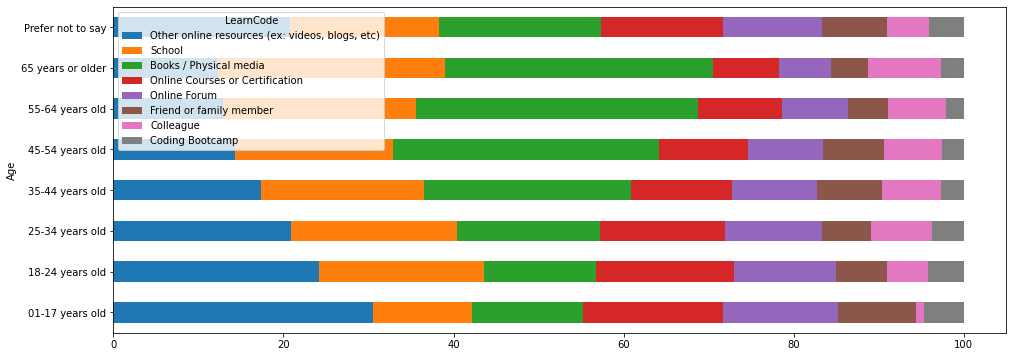

In [95]:
# Draw a horizontal bar graph showing the breakup of the LearnCodes, percentage-wise across all the age groups 
page_learn_pt.plot.barh(stacked=True, figsize=(16, 6));
# Note that the blue,purple,brown and pink chunks representing online LearnCodes is predominant across all age groups
# Except the older age groups who learnt from books and physical media

#### Years coding

In [96]:
# Look in the survey pdf page# 5 under Education, work, and career
# Copy the relevant question "Including any education, how many years have you been coding in total?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'Including any education, how many years have you been coding in total?'
search_str
# We need to find which column in the results dataset contains the answer

'Including any education, how many years have you been coding in total?'

In [97]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'YearsCode' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
12,QID32,YearsCode,"Including any education, how many years have y...",False,MC,DL


In [98]:
# We also need the Country of the respondents to understand country-wise coding ages
# We need to work with the 'Country' column in the survey dataframe 

In [99]:
# Extract the Country and YearsCode column in the survey dataframe to a separate dataframe
years_df = survey_df[['Country','YearsCode']].copy()
years_df.dropna(subset = ['YearsCode'], inplace=True)
years_df
# Since this question is not force-response True, we dropped rows with invalid responses in YearsCode column

,Country,YearsCode
1,Netherlands,7
4,United Kingdom of Great Britain and Northern I...,17
6,United States of America,3
7,Malaysia,4
8,India,6
...,...,...
83434,United States of America,6
83435,Benin,4
83436,United States of America,10
83437,Canada,5


In [100]:
# Save the number of respondents to the yearsCode question
yearsCode_responses = learn_df.shape[0]
yearsCode_responses

82963

In [101]:
# Check for null values, if any
years_df.isna().sum()
# We don't have any null value

Country      0
YearsCode    0
dtype: int64

In [102]:
# Check out the YearsCode values
years_df.YearsCode.value_counts()
# Note that there are a couple of values that are not in numbers

5                     6190
10                    6067
6                     5565
4                     5049
7                     4940
8                     4714
3                     4449
15                    3625
20                    3419
2                     3342
12                    3188
9                     3009
11                    2344
13                    2016
25                    1984
14                    1813
1                     1695
30                    1660
16                    1491
Less than 1 year      1489
18                    1386
17                    1331
35                    1007
22                     941
21                     863
40                     830
23                     811
19                     659
24                     639
26                     533
27                     492
28                     455
38                     361
32                     331
37                     329
33                     309
34                     268
3

In [103]:
# Replace 'Less than 1 year' with 0.5
years_df.loc[years_df['YearsCode'] == 'Less than 1 year', 'YearsCode'] = '0.5'
years_df.YearsCode.value_counts()
# Note that the 1,489 'Less than 1 year' values are now 0.5

5                     6190
10                    6067
6                     5565
4                     5049
7                     4940
8                     4714
3                     4449
15                    3625
20                    3419
2                     3342
12                    3188
9                     3009
11                    2344
13                    2016
25                    1984
14                    1813
1                     1695
30                    1660
16                    1491
0.5                   1489
18                    1386
17                    1331
35                    1007
22                     941
21                     863
40                     830
23                     811
19                     659
24                     639
26                     533
27                     492
28                     455
38                     361
32                     331
37                     329
33                     309
34                     268
3

In [104]:
# Replace 'More than 50 years' with 55
years_df.loc[years_df['YearsCode'] == 'More than 50 years', 'YearsCode'] = '55'
years_df.YearsCode.value_counts()
# Note that the 170 'More than 50 years' values are now 55

5      6190
10     6067
6      5565
4      5049
7      4940
8      4714
3      4449
15     3625
20     3419
2      3342
12     3188
9      3009
11     2344
13     2016
25     1984
14     1813
1      1695
30     1660
16     1491
0.5    1489
18     1386
17     1331
35     1007
22      941
21      863
40      830
23      811
19      659
24      639
26      533
27      492
28      455
38      361
32      331
37      329
33      309
34      268
36      264
31      219
39      205
42      203
29      197
41      179
55      170
45      156
43      124
44       90
46       67
50       58
47       52
48       33
49       30
Name: YearsCode, dtype: int64

In [105]:
# Check the data types of the columns
years_df.info()
# Note that YearsCode is not a numeric column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81641 entries, 1 to 83438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    81641 non-null  object
 1   YearsCode  81641 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [106]:
# Convert the YearsCode column values to numeric
years_df['YearsCode'] = pd.to_numeric(years_df.YearsCode)
years_df.info()
# Note that YearsCode is now a numeric column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81641 entries, 1 to 83438
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    81641 non-null  object 
 1   YearsCode  81641 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [107]:
# Review the years dataframe
years_df

,Country,YearsCode
1,Netherlands,7.0
4,United Kingdom of Great Britain and Northern I...,17.0
6,United States of America,3.0
7,Malaysia,4.0
8,India,6.0
...,...,...
83434,United States of America,6.0
83435,Benin,4.0
83436,United States of America,10.0
83437,Canada,5.0


In [115]:
# create a list of delimiters for the bins into which the responses need to be tallied
ranges = [0, 0.9] + list(range(4, 50, 5)) + [100]
ranges

[0, 0.9, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 100]

In [116]:
# Add a bins column to the years dataframe 
years_df["bins"] = pd.cut(years_df['YearsCode'], ranges)
years_df
# The bin values correspond to the YearsCode values' bin range

,Country,YearsCode,bins
1,Netherlands,7.0,"(4.0, 9.0]"
4,United Kingdom of Great Britain and Northern I...,17.0,"(14.0, 19.0]"
6,United States of America,3.0,"(0.9, 4.0]"
7,Malaysia,4.0,"(0.9, 4.0]"
8,India,6.0,"(4.0, 9.0]"
...,...,...,...
83434,United States of America,6.0,"(4.0, 9.0]"
83435,Benin,4.0,"(0.9, 4.0]"
83436,United States of America,10.0,"(9.0, 14.0]"
83437,Canada,5.0,"(4.0, 9.0]"


In [117]:
# Checkout the tallies for each of the bins
years_df.bins.value_counts()

(4.0, 9.0]       24418
(9.0, 14.0]      15428
(0.9, 4.0]       14535
(14.0, 19.0]      8492
(19.0, 24.0]      6673
(24.0, 29.0]      3661
(29.0, 34.0]      2787
(34.0, 39.0]      2166
(0.0, 0.9]        1489
(39.0, 44.0]      1426
(44.0, 49.0]       338
(49.0, 100.0]      228
Name: bins, dtype: int64

In [118]:
# Create a dataframe with the sorted Value counts in the bins column
yrs_bins_df = pd.DataFrame(years_df.bins.value_counts()).reset_index()
yrs_bins_df
# We need to fix the column headings

,index,bins
0,"(4.0, 9.0]",24418
1,"(9.0, 14.0]",15428
2,"(0.9, 4.0]",14535
3,"(14.0, 19.0]",8492
4,"(19.0, 24.0]",6673
5,"(24.0, 29.0]",3661
6,"(29.0, 34.0]",2787
7,"(34.0, 39.0]",2166
8,"(0.0, 0.9]",1489
9,"(39.0, 44.0]",1426


In [119]:
# Rename the columns of the years bins dataframe
yrs_bins_df.columns = ['bins', 'Responses']
yrs_bins_df

,bins,Responses
0,"(4.0, 9.0]",24418
1,"(9.0, 14.0]",15428
2,"(0.9, 4.0]",14535
3,"(14.0, 19.0]",8492
4,"(19.0, 24.0]",6673
5,"(24.0, 29.0]",3661
6,"(29.0, 34.0]",2787
7,"(34.0, 39.0]",2166
8,"(0.0, 0.9]",1489
9,"(39.0, 44.0]",1426


In [120]:
# Add a percentage column to the  years bins dataframe
yrs_bins_df['Percentage'] = round(yrs_bins_df.Responses / yearsCode_responses * 100, 2)
yrs_bins_df

,bins,Responses,Percentage
0,"(4.0, 9.0]",24418,29.43
1,"(9.0, 14.0]",15428,18.60
2,"(0.9, 4.0]",14535,17.52
3,"(14.0, 19.0]",8492,10.24
4,"(19.0, 24.0]",6673,8.04
5,"(24.0, 29.0]",3661,4.41
6,"(29.0, 34.0]",2787,3.36
7,"(34.0, 39.0]",2166,2.61
8,"(0.0, 0.9]",1489,1.79
9,"(39.0, 44.0]",1426,1.72


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#experience-years-code" target = "_blank">here</a> to verify with StackOverflow

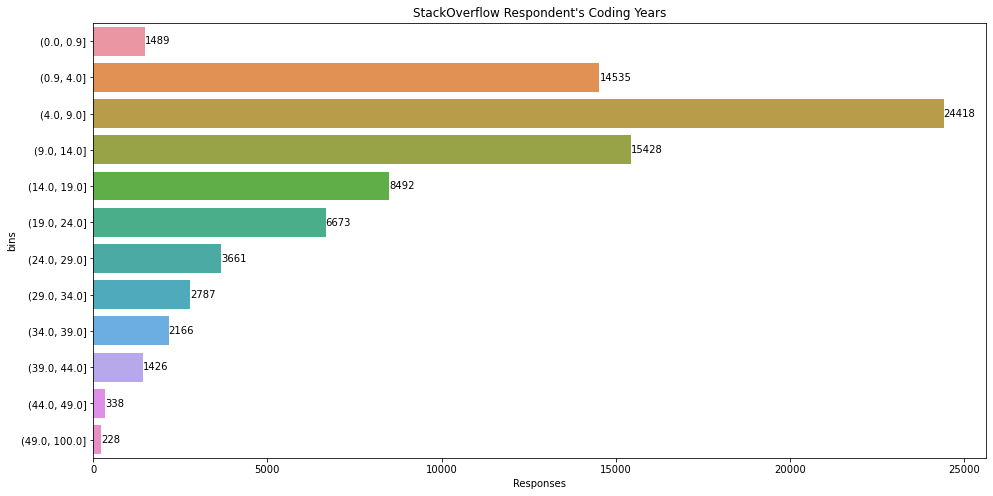

In [123]:
# Draw a horizontal bar chart of the Years Coded represented in the survey by responses
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=yrs_bins_df, x='Responses', y='bins')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondent's Coding Years");

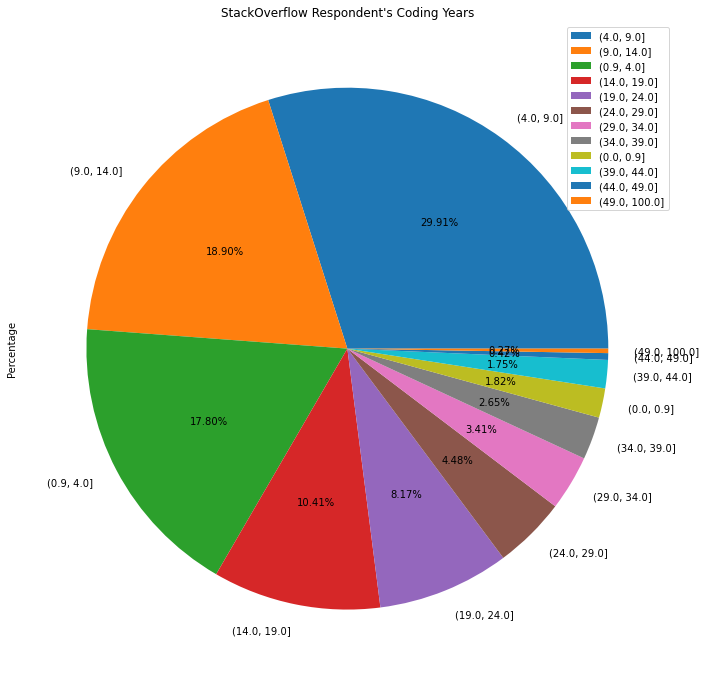

In [124]:
# Draw a pie chart of the Years Coded represented in the survey by percentages
yrs_pie_df = yrs_bins_df.set_index('bins')
yrs_pie_df.plot.pie(figsize=(16, 12), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Respondent's Coding Years");

In [125]:
# Create a Dataframe of number of respondents country-wise
ctry_count_df = years_df.groupby('Country', as_index=False)['YearsCode'].count().sort_values('YearsCode', ascending=False)
ctry_count_df
# The top countries listed however do not have significant number of respondents

,Country,YearsCode
173,United States of America,15059
69,India,10112
58,Germany,5516
171,United Kingdom of Great Britain and Northern I...,4429
29,Canada,2962
...,...,...
46,Dominica,1
136,Saint Kitts and Nevis,1
98,Mali,1
56,Gambia,1


In [126]:
# Check for null values
ctry_count_df.isna().sum()
# We do not have any null values

Country      0
YearsCode    0
dtype: int64

In [127]:
# Rename the 'YearsCode' column to 'Responses'
ctry_count_df.columns = ['Country', 'Responses']
ctry_count_df

,Country,Responses
173,United States of America,15059
69,India,10112
58,Germany,5516
171,United Kingdom of Great Britain and Northern I...,4429
29,Canada,2962
...,...,...
46,Dominica,1
136,Saint Kitts and Nevis,1
98,Mali,1
56,Gambia,1


In [131]:
# Create a Dataframe of average years coded by respondents country-wise
ctry_yrs_df = years_df.groupby('Country', as_index=False)['YearsCode'].mean().sort_values('YearsCode', ascending=False)
ctry_yrs_df
# The top countries listed however do not have significant number of respondents

,Country,YearsCode
104,Monaco,33.500000
139,San Marino,28.500000
31,Central African Republic,26.333333
45,Djibouti,26.000000
117,Nomadic,16.823529
...,...,...
143,Sierra Leone,3.000000
138,Saint Vincent and the Grenadines,3.000000
32,Chad,2.750000
137,Saint Lucia,1.166667


In [133]:
# Round off the YearsCode column to 2 decimal digits
ctry_yrs_df['YearsCode'] = np.round(ctry_yrs_df.YearsCode, 2)
ctry_yrs_df

,Country,YearsCode
104,Monaco,33.50
139,San Marino,28.50
31,Central African Republic,26.33
45,Djibouti,26.00
117,Nomadic,16.82
...,...,...
143,Sierra Leone,3.00
138,Saint Vincent and the Grenadines,3.00
32,Chad,2.75
137,Saint Lucia,1.17


In [134]:
# Merge the count and yearsCode dataframes on Country column
count_yrs_df = pd.merge(ctry_count_df, ctry_yrs_df, on='Country')\
.sort_values('Responses', ascending=False)
count_yrs_df

,Country,Responses,YearsCode
0,United States of America,15059,15.78
1,India,10112,7.19
2,Germany,5516,14.09
3,United Kingdom of Great Britain and Northern I...,4429,16.36
4,Canada,2962,13.98
...,...,...,...
176,Dominica,1,7.00
177,Saint Kitts and Nevis,1,5.00
178,Mali,1,5.00
179,Gambia,1,6.00


In [135]:
# Review the list of the top 10 countries represented in the survey
trty_10_df = territory_df.head(10)[['Country','Percentage' ]]
trty_10_df

,Country,Percentage
0,United States of America,18.32
1,India,12.60
2,Germany,6.74
3,United Kingdom of Great Britain and Northern I...,5.36
4,Canada,3.61
5,France,3.25
6,Brazil,2.70
7,Poland,2.16
8,Netherlands,2.12
9,Italy,2.00


In [136]:
# Merge the top-10 Countries and count-yearsCode dataframes on Country column
ctry_10_avg = pd.merge(trty_10_df, count_yrs_df, on='Country')\
.drop(['Percentage'], axis=1)\
.sort_values('YearsCode', ascending=False)
ctry_10_avg

,Country,Responses,YearsCode
3,United Kingdom of Great Britain and Northern I...,4429,16.36
0,United States of America,15059,15.78
8,Netherlands,1747,14.62
9,Italy,1631,14.24
2,Germany,5516,14.09
4,Canada,2962,13.98
5,France,2662,12.56
6,Brazil,2226,11.35
7,Poland,1775,10.69
1,India,10112,7.19


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#experience-years-code-country" target = "_blank">here</a> to verify with StackOverflow

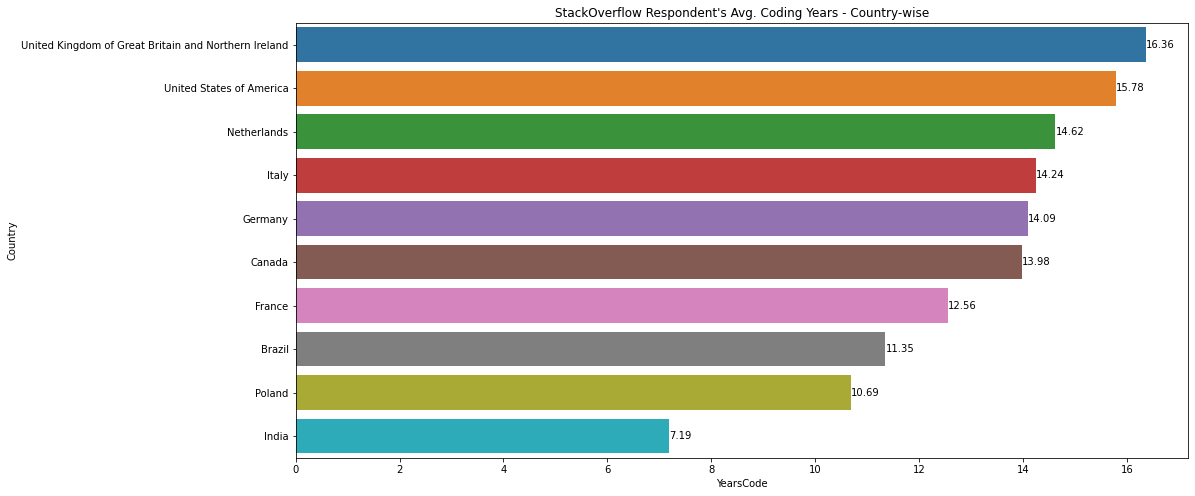

In [138]:
# Draw a horizontal bar chart of the average Years Coded represented in the survey for top 10 countries
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=ctry_10_avg, x='YearsCode', y='Country')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("StackOverflow Respondent's Avg. Coding Years - Country-wise");

#### Years coding professionally

In [139]:
# Look in the survey pdf page# 5 under Education, work, and career
# Copy the relevant question "NOT including education, how many years have you coded professionally (as a part of your work)?" 
# into the clipboard buffer
# Assign the copied text to the search string
search_str = 'NOT including education, how many years have you coded professionally (as a part of your work)?'
search_str
# We need to find which column in the results dataset contains the answer

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [140]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'YearsCodePro' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
13,QID34,YearsCodePro,"NOT including education, how many years have y...",False,MC,DL


In [141]:
# We also need the 'Developer Type' of the respondents to understand profession-wise Coding experience
# Look in the survey pdf page# 5 under Education, work, and career
# Copy the relevant question "Which of the following describes your current job?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'Which of the following describes your current job?'
search_str
# We need to find which column in the results dataset contains the answer

'Which of the following describes your current job?'

In [142]:
# call the look_where function with the search string 
look_where(search_str)
# We also need to work with the 'DevType' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
14,QID31,DevType,Which of the following describes your current ...,False,MC,MAVR


In [143]:
# Extract the DevType and YearsCodePro column in the survey dataframe to a separate dataframe
yearsPro_df = survey_df[['DevType','YearsCodePro']].copy()
yearsPro_df.dropna(subset = ['YearsCodePro'], inplace=True)
yearsPro_df
# Since this question is not force-response True, we dropped rows with invalid responses in YearsCodePro column

,DevType,YearsCodePro
4,"Developer, desktop or enterprise applications;...",10
8,"Developer, front-end",4
9,Data scientist or machine learning specialist,4
10,"Developer, back-end",10
11,"Developer, back-end",5
...,...,...
83434,"Developer, back-end",5
83435,"Developer, full-stack",2
83436,Data scientist or machine learning specialist;...,4
83437,"Developer, back-end",3


In [144]:
# Save the number of respondents to the 'YearsCodePro' question
yearsPro_responses = yearsPro_df.shape[0]
yearsPro_responses

61216

In [145]:
# Check out the YearsCode values
yearsPro_df.YearsCodePro.value_counts()
# Note that there are a couple of values that are not in numbers

3                     5812
2                     5472
5                     5095
4                     4803
6                     3804
10                    3780
7                     3159
1                     3047
8                     2844
Less than 1 year      2699
15                    2249
20                    1835
9                     1814
12                    1733
11                    1533
13                    1267
14                    1092
16                     970
25                     907
17                     770
21                     765
18                     695
22                     653
30                     527
23                     525
24                     435
19                     392
26                     321
35                     256
27                     236
28                     222
32                     186
31                     156
40                     152
33                     148
29                     146
36                     114
3

In [146]:
# Replace 'Less than 1 year' with 0.5
yearsPro_df.loc[yearsPro_df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = '0.5'
yearsPro_df.YearsCodePro.value_counts()
# Note that the 2,699 'Less than 1 year' values are now 0.5

3                     5812
2                     5472
5                     5095
4                     4803
6                     3804
10                    3780
7                     3159
1                     3047
8                     2844
0.5                   2699
15                    2249
20                    1835
9                     1814
12                    1733
11                    1533
13                    1267
14                    1092
16                     970
25                     907
17                     770
21                     765
18                     695
22                     653
30                     527
23                     525
24                     435
19                     392
26                     321
35                     256
27                     236
28                     222
32                     186
31                     156
40                     152
33                     148
29                     146
36                     114
3

In [147]:
# Replace 'More than 50 years' with 55
yearsPro_df.loc[yearsPro_df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = '55'
yearsPro_df.YearsCodePro.value_counts()
# Note that the 50 ''More than 50 years' values are now 55

3      5812
2      5472
5      5095
4      4803
6      3804
10     3780
7      3159
1      3047
8      2844
0.5    2699
15     2249
20     1835
9      1814
12     1733
11     1533
13     1267
14     1092
16      970
25      907
17      770
21      765
18      695
22      653
30      527
23      525
24      435
19      392
26      321
35      256
27      236
28      222
32      186
31      156
40      152
33      148
29      146
36      114
34      104
37       91
38       78
42       52
55       50
39       43
41       38
45       34
43       31
44       29
46       13
47       13
50       12
48        9
49        5
Name: YearsCodePro, dtype: int64

In [148]:
# Check the data types of the columns
yearsPro_df.info()
# Note that YearsCodePro is not a numeric column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61216 entries, 4 to 83438
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DevType       60586 non-null  object
 1   YearsCodePro  61216 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [149]:
# Convert the values of YearsCodePro column values to numeric
yearsPro_df['YearsCodePro'] = pd.to_numeric(yearsPro_df.YearsCodePro)
yearsPro_df.info()
# Note that YearsCodePro is now a numeric column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61216 entries, 4 to 83438
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DevType       60586 non-null  object 
 1   YearsCodePro  61216 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [150]:
# Review the years_pro dataframe
yearsPro_df

,DevType,YearsCodePro
4,"Developer, desktop or enterprise applications;...",10.0
8,"Developer, front-end",4.0
9,Data scientist or machine learning specialist,4.0
10,"Developer, back-end",10.0
11,"Developer, back-end",5.0
...,...,...
83434,"Developer, back-end",5.0
83435,"Developer, full-stack",2.0
83436,Data scientist or machine learning specialist;...,4.0
83437,"Developer, back-end",3.0


In [151]:
# create a list of delimiters for the bins into which the responses need to be tallied
ranges = [0, 0.9] + list(range(4, 50, 5)) + [100]
ranges

[0, 0.9, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 100]

In [152]:
# Add a bins column to the yearsPro dataframe 
yearsPro_df["bins"] = pd.cut(yearsPro_df['YearsCodePro'], ranges)
yearsPro_df
# The bin values correspond to the YearsCodePro values' bin range

,DevType,YearsCodePro,bins
4,"Developer, desktop or enterprise applications;...",10.0,"(9.0, 14.0]"
8,"Developer, front-end",4.0,"(0.9, 4.0]"
9,Data scientist or machine learning specialist,4.0,"(0.9, 4.0]"
10,"Developer, back-end",10.0,"(9.0, 14.0]"
11,"Developer, back-end",5.0,"(4.0, 9.0]"
...,...,...,...
83434,"Developer, back-end",5.0,"(4.0, 9.0]"
83435,"Developer, full-stack",2.0,"(0.9, 4.0]"
83436,Data scientist or machine learning specialist;...,4.0,"(0.9, 4.0]"
83437,"Developer, back-end",3.0,"(0.9, 4.0]"


In [153]:
# Checkout the bin tallies
yearsPro_df.bins.value_counts()

(0.9, 4.0]       19134
(4.0, 9.0]       16716
(9.0, 14.0]       9405
(14.0, 19.0]      5076
(19.0, 24.0]      4213
(0.0, 0.9]        2699
(24.0, 29.0]      1832
(29.0, 34.0]      1121
(34.0, 39.0]       582
(39.0, 44.0]       302
(44.0, 49.0]        74
(49.0, 100.0]       62
Name: bins, dtype: int64

In [154]:
# Create a dataframe with the sorted Value counts in the bins column
yrsPro_bins_df = pd.DataFrame(yearsPro_df.bins.value_counts()).reset_index()
yrsPro_bins_df
# We need to fix the column headings

,index,bins
0,"(0.9, 4.0]",19134
1,"(4.0, 9.0]",16716
2,"(9.0, 14.0]",9405
3,"(14.0, 19.0]",5076
4,"(19.0, 24.0]",4213
5,"(0.0, 0.9]",2699
6,"(24.0, 29.0]",1832
7,"(29.0, 34.0]",1121
8,"(34.0, 39.0]",582
9,"(39.0, 44.0]",302


In [155]:
# Rename the columns of the yearsPro bins dataframe
yrsPro_bins_df.columns = ['bins', 'Responses']
yrsPro_bins_df

,bins,Responses
0,"(0.9, 4.0]",19134
1,"(4.0, 9.0]",16716
2,"(9.0, 14.0]",9405
3,"(14.0, 19.0]",5076
4,"(19.0, 24.0]",4213
5,"(0.0, 0.9]",2699
6,"(24.0, 29.0]",1832
7,"(29.0, 34.0]",1121
8,"(34.0, 39.0]",582
9,"(39.0, 44.0]",302


In [156]:
# Add a percentage column to the  yearsPro bins dataframe
yrsPro_bins_df['Percentage'] = round(yrsPro_bins_df.Responses / yearsPro_responses * 100, 2)
yrsPro_bins_df

,bins,Responses,Percentage
0,"(0.9, 4.0]",19134,31.26
1,"(4.0, 9.0]",16716,27.31
2,"(9.0, 14.0]",9405,15.36
3,"(14.0, 19.0]",5076,8.29
4,"(19.0, 24.0]",4213,6.88
5,"(0.0, 0.9]",2699,4.41
6,"(24.0, 29.0]",1832,2.99
7,"(29.0, 34.0]",1121,1.83
8,"(34.0, 39.0]",582,0.95
9,"(39.0, 44.0]",302,0.49


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#section-experience-years-coding-professionally" target = "_blank">here</a> to verify with StackOverflow

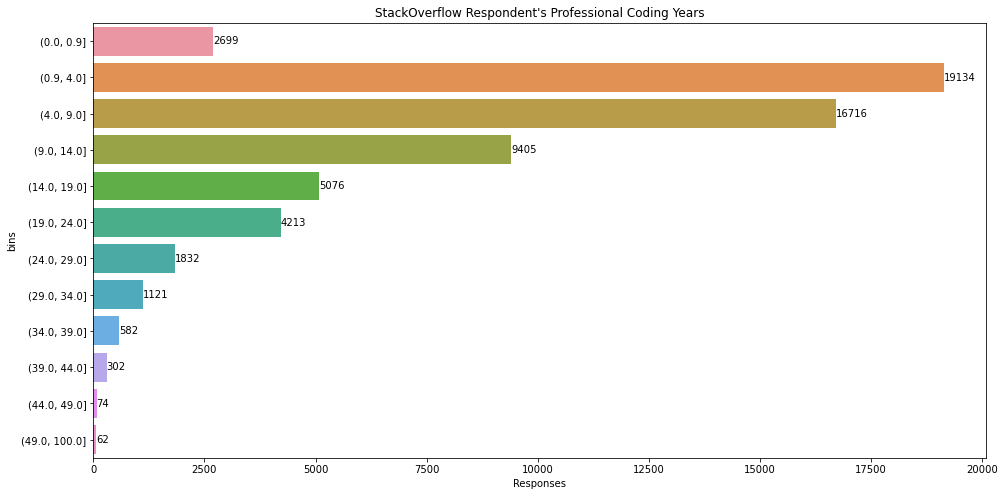

In [158]:
# Draw a horizontal bar chart of the Years Coding Professionally represented in the survey by responses
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=yrsPro_bins_df, x='Responses', y='bins')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondent's Professional Coding Years");

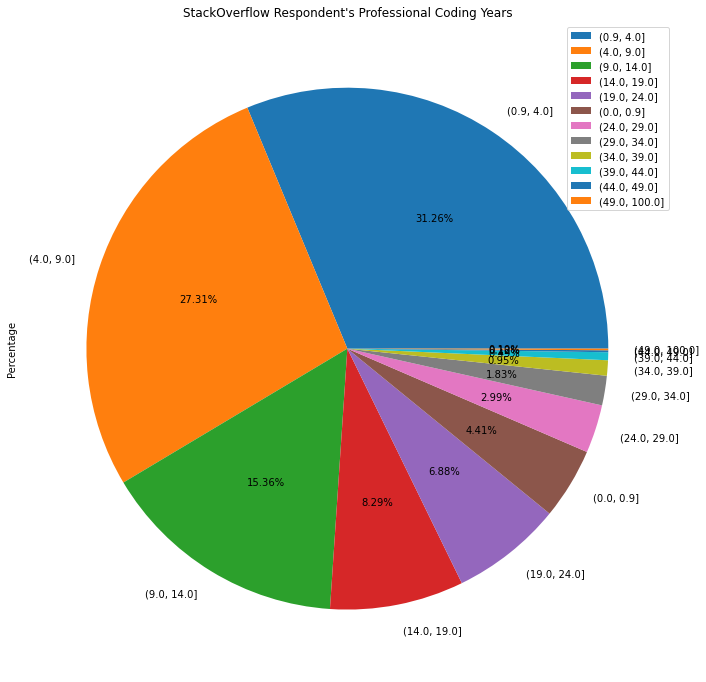

In [159]:
# Draw a pie chart of the Years Coding Professionally represented in the survey by percentages
yrsPro_pie_df = yrsPro_bins_df.set_index('bins')
yrsPro_pie_df.plot.pie(figsize=(16, 12), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Respondent's Professional Coding Years");
# majority of respondents have been working for less than 10 years as a professional developer

#### Years of professional coding experience by developer type

In [160]:
# Review the years_pro dataframe
yearsPro_df

,DevType,YearsCodePro,bins
4,"Developer, desktop or enterprise applications;...",10.0,"(9.0, 14.0]"
8,"Developer, front-end",4.0,"(0.9, 4.0]"
9,Data scientist or machine learning specialist,4.0,"(0.9, 4.0]"
10,"Developer, back-end",10.0,"(9.0, 14.0]"
11,"Developer, back-end",5.0,"(4.0, 9.0]"
...,...,...,...
83434,"Developer, back-end",5.0,"(4.0, 9.0]"
83435,"Developer, full-stack",2.0,"(0.9, 4.0]"
83436,Data scientist or machine learning specialist;...,4.0,"(0.9, 4.0]"
83437,"Developer, back-end",3.0,"(0.9, 4.0]"


In [161]:
# Let's drop the bins column from the years_pro dataframe
yearsPro_df.drop('bins', axis=1, inplace=True)
yearsPro_df

,DevType,YearsCodePro
4,"Developer, desktop or enterprise applications;...",10.0
8,"Developer, front-end",4.0
9,Data scientist or machine learning specialist,4.0
10,"Developer, back-end",10.0
11,"Developer, back-end",5.0
...,...,...
83434,"Developer, back-end",5.0
83435,"Developer, full-stack",2.0
83436,Data scientist or machine learning specialist;...,4.0
83437,"Developer, back-end",3.0


In [162]:
# Check null values, if any
yearsPro_df.isna().sum()
# We have 630 any null values for DevType

DevType         630
YearsCodePro      0
dtype: int64

In [163]:
# Let us get rid of rows that do not have a valid Developer Type
yearsPro_df.dropna(subset=['DevType'], inplace=True)
yearsPro_df

,DevType,YearsCodePro
4,"Developer, desktop or enterprise applications;...",10.0
8,"Developer, front-end",4.0
9,Data scientist or machine learning specialist,4.0
10,"Developer, back-end",10.0
11,"Developer, back-end",5.0
...,...,...
83434,"Developer, back-end",5.0
83435,"Developer, full-stack",2.0
83436,Data scientist or machine learning specialist;...,4.0
83437,"Developer, back-end",3.0


In [183]:
# Explode the DevType column values to multiple rows by splitting on semicolons
all_yrsPro_df = (yearsPro_df.set_index(['YearsCodePro'])
            .apply(lambda x: x.str.split(';').explode())
            .reset_index()).copy() 
all_yrsPro_df
# To protect the other column from the apply function, we convert it to index and subsequently restore it as a column

,YearsCodePro,DevType
0,10.0,"Developer, desktop or enterprise applications"
1,10.0,"Developer, full-stack"
2,10.0,"Engineer, data"
3,10.0,Other (please specify):
4,4.0,"Developer, front-end"
...,...,...
161015,4.0,DevOps specialist
161016,3.0,"Developer, back-end"
161017,4.0,"Developer, front-end"
161018,4.0,"Developer, full-stack"


In [184]:
# Check the DevType breakups
all_yrsPro_df.DevType.value_counts()
# Note that the DevType value 'Other (please specify):' does not make sense

Developer, full-stack                            31109
Developer, back-end                              27560
Developer, front-end                             17007
Developer, desktop or enterprise applications    10470
Developer, mobile                                 9052
DevOps specialist                                 6861
System administrator                              5607
Database administrator                            5358
Developer, embedded applications or devices       4341
Designer                                          4143
Engineer, data                                    3948
Data scientist or machine learning specialist     3946
Engineering manager                               3674
Data or business analyst                          3499
Developer, QA or test                             3433
Product manager                                   2881
Other (please specify):                           2677
Academic researcher                               2612
Engineer, 

In [185]:
# Delete the rows with DevType value 'Other (please specify):'
all_yrsPro_df = all_yrsPro_df[all_yrsPro_df.DevType != 'Other (please specify):'].copy()
all_yrsPro_df

,YearsCodePro,DevType
0,10.0,"Developer, desktop or enterprise applications"
1,10.0,"Developer, full-stack"
2,10.0,"Engineer, data"
4,4.0,"Developer, front-end"
5,4.0,Data scientist or machine learning specialist
...,...,...
161015,4.0,DevOps specialist
161016,3.0,"Developer, back-end"
161017,4.0,"Developer, front-end"
161018,4.0,"Developer, full-stack"


In [186]:
# Create a Dataframe of average years coded by respondents DevType-wise
yrsPro_avg_df = all_yrsPro_df.groupby('DevType', as_index=False)['YearsCodePro'].mean()\
                .sort_values('YearsCodePro', ascending=False)
yrsPro_avg_df
# The backslash merely allows the code to break into the next line 

,DevType,YearsCodePro
21,"Senior Executive (C-Suite, VP, etc.)",15.773387
17,Engineering manager,13.786473
19,Product manager,12.296078
3,Database administrator,12.033128
8,"Developer, desktop or enterprise applications",11.932378
23,System administrator,11.877920
14,Educator,11.849764
4,Designer,11.604031
18,Marketing or sales professional,11.464775
9,"Developer, embedded applications or devices",11.339783


In [187]:
# Round off the YearsCodePro column to 2 decimal digits
yrsPro_avg_df['YearsCodePro'] = np.round(yrsPro_avg_df.YearsCodePro, 2)
yrsPro_avg_df
# The more senior positions have more years of expeience

,DevType,YearsCodePro
21,"Senior Executive (C-Suite, VP, etc.)",15.77
17,Engineering manager,13.79
19,Product manager,12.30
3,Database administrator,12.03
8,"Developer, desktop or enterprise applications",11.93
23,System administrator,11.88
14,Educator,11.85
4,Designer,11.60
18,Marketing or sales professional,11.46
9,"Developer, embedded applications or devices",11.34


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#section-experience-years-of-professional-coding-experience-by-developer-type" target = "_blank">here</a> to verify with StackOverflow

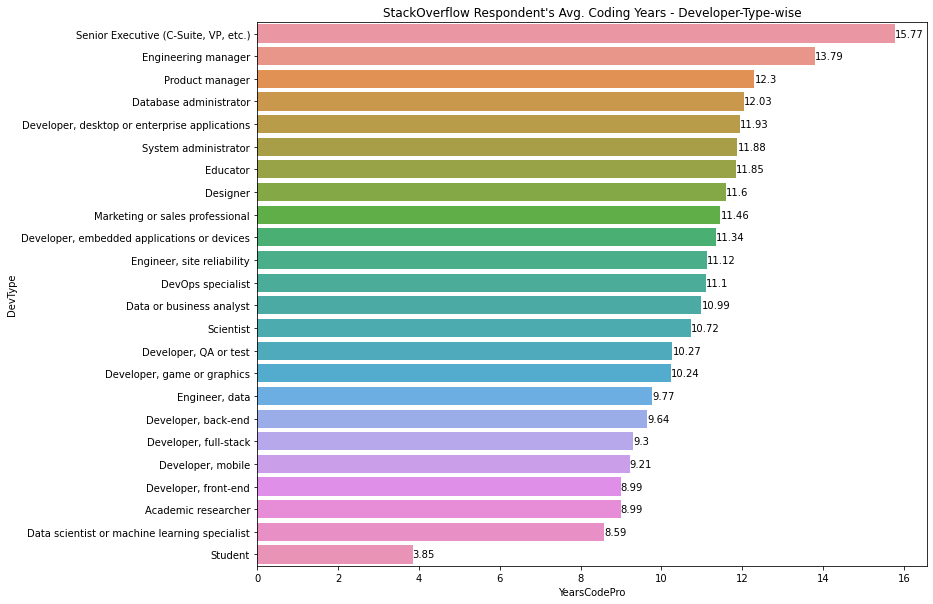

In [182]:
# Draw a horizontal bar chart of the average Years Coded represented in the survey for Developers
plt.figure(figsize=(12, 10))
ax = sns.barplot(data=yrsPro_avg_df, x='YearsCodePro', y='DevType')
for i in ax.containers:
    ax.bar_label(i,)
plt.title("StackOverflow Respondent's Avg. Coding Years - Developer-Type-wise");

## c) Developer roles

#### Developer type

In [188]:
# Extract the DevType and Country columns in the survey dataframe to a separate dataframe
devTyp_df = survey_df[['DevType', 'Country']].dropna().copy()
devTyp_df
# We know that Country cannot be null, so we dropped null DevType records

,DevType,Country
0,"Developer, mobile",Slovakia
3,"Developer, front-end",Austria
4,"Developer, desktop or enterprise applications;...",United Kingdom of Great Britain and Northern I...
8,"Developer, front-end",India
9,Data scientist or machine learning specialist,Sweden
...,...,...
83434,"Developer, back-end",United States of America
83435,"Developer, full-stack",Benin
83436,Data scientist or machine learning specialist;...,United States of America
83437,"Developer, back-end",Canada


In [189]:
# Determine the number of Developers
devType_responses = devTyp_df.shape[0]
devType_responses

66484

In [190]:
# Calculate the number of US Developers
us_devType_responses = devTyp_df[devTyp_df.Country == 'United States of America'].shape[0]
us_devType_responses

12748

In [191]:
# Explode the DevType column values to multiple rows by splitting on semicolons
all_devTyp_df = (devTyp_df.set_index(['Country'])
            .apply(lambda x: x.str.split(';').explode())
            .reset_index()).copy() 
all_devTyp_df
# To protect the other column from the apply function, we convert it to index and subsequently restore it as a column

,Country,DevType
0,Slovakia,"Developer, mobile"
1,Austria,"Developer, front-end"
2,United Kingdom of Great Britain and Northern I...,"Developer, desktop or enterprise applications"
3,United Kingdom of Great Britain and Northern I...,"Developer, full-stack"
4,United Kingdom of Great Britain and Northern I...,"Engineer, data"
...,...,...
174077,United States of America,DevOps specialist
174078,Canada,"Developer, back-end"
174079,Brazil,"Developer, front-end"
174080,Brazil,"Developer, full-stack"


In [192]:
# Check the Developer Type breakups
all_devTyp_df.DevType.value_counts()
# Note that the Developer Type 'Other (please specify):' does not make sense

Developer, full-stack                            32891
Developer, back-end                              29071
Developer, front-end                             18231
Developer, desktop or enterprise applications    11036
Developer, mobile                                 9800
DevOps specialist                                 7058
System administrator                              6079
Database administrator                            5655
Designer                                          4611
Developer, embedded applications or devices       4598
Data scientist or machine learning specialist     4273
Student                                           4187
Engineer, data                                    4176
Engineering manager                               3810
Data or business analyst                          3792
Developer, QA or test                             3611
Other (please specify):                           3545
Product manager                                   3074
Academic r

In [193]:
# Delete the rows with Developer Type value 'Other (please specify):'
all_devTyp_df = all_devTyp_df[all_devTyp_df.DevType != 'Other (please specify):'].copy()
all_devTyp_df

,Country,DevType
0,Slovakia,"Developer, mobile"
1,Austria,"Developer, front-end"
2,United Kingdom of Great Britain and Northern I...,"Developer, desktop or enterprise applications"
3,United Kingdom of Great Britain and Northern I...,"Developer, full-stack"
4,United Kingdom of Great Britain and Northern I...,"Engineer, data"
...,...,...
174077,United States of America,DevOps specialist
174078,Canada,"Developer, back-end"
174079,Brazil,"Developer, front-end"
174080,Brazil,"Developer, full-stack"


In [194]:
# Create a dataframe with the sorted Value counts in the DevType column
srt_devTyp_df = pd.DataFrame(all_devTyp_df.DevType.value_counts()).reset_index()
srt_devTyp_df
# We need to fix the column headings

,index,DevType
0,"Developer, full-stack",32891
1,"Developer, back-end",29071
2,"Developer, front-end",18231
3,"Developer, desktop or enterprise applications",11036
4,"Developer, mobile",9800
5,DevOps specialist,7058
6,System administrator,6079
7,Database administrator,5655
8,Designer,4611
9,"Developer, embedded applications or devices",4598


In [195]:
# Rename the columns of the srt_devTyp_df dataframe
srt_devTyp_df.columns = ['DevType', 'Responses']
srt_devTyp_df

,DevType,Responses
0,"Developer, full-stack",32891
1,"Developer, back-end",29071
2,"Developer, front-end",18231
3,"Developer, desktop or enterprise applications",11036
4,"Developer, mobile",9800
5,DevOps specialist,7058
6,System administrator,6079
7,Database administrator,5655
8,Designer,4611
9,"Developer, embedded applications or devices",4598


In [196]:
# Add a percentage column to the srt_devTyp_df dataframe
srt_devTyp_df['Percentage'] = round(srt_devTyp_df.Responses / devType_responses * 100, 2)
srt_devTyp_df

,DevType,Responses,Percentage
0,"Developer, full-stack",32891,49.47
1,"Developer, back-end",29071,43.73
2,"Developer, front-end",18231,27.42
3,"Developer, desktop or enterprise applications",11036,16.60
4,"Developer, mobile",9800,14.74
5,DevOps specialist,7058,10.62
6,System administrator,6079,9.14
7,Database administrator,5655,8.51
8,Designer,4611,6.94
9,"Developer, embedded applications or devices",4598,6.92


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#developer-roles-dev-type" target = "_blank">here</a> to verify with StackOverflow

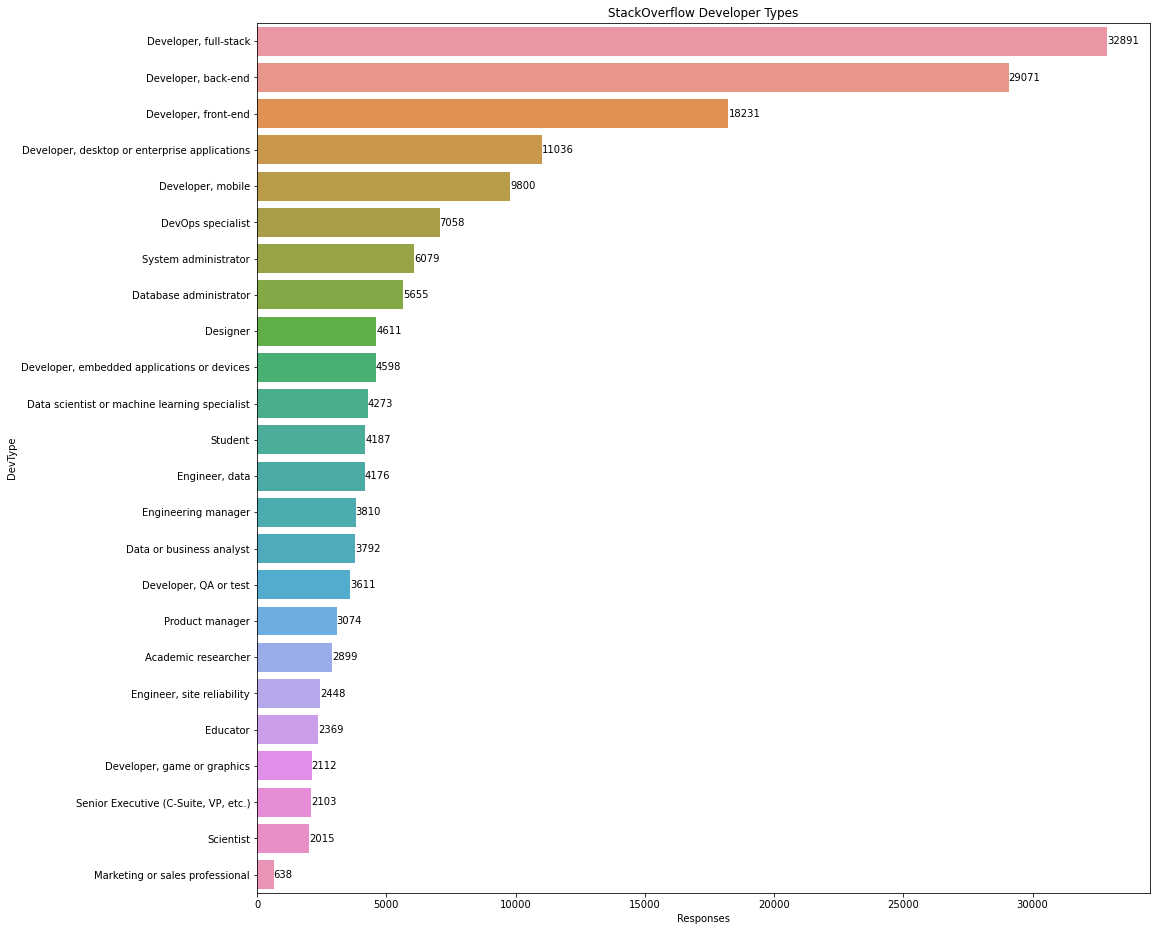

In [201]:
# Draw a horizontal bar chart of Developer Types represented in the survey for Developers
plt.figure(figsize=(16, 16))
ax = sns.barplot(data=srt_devTyp_df, x='Responses', y='DevType')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Developer Types");

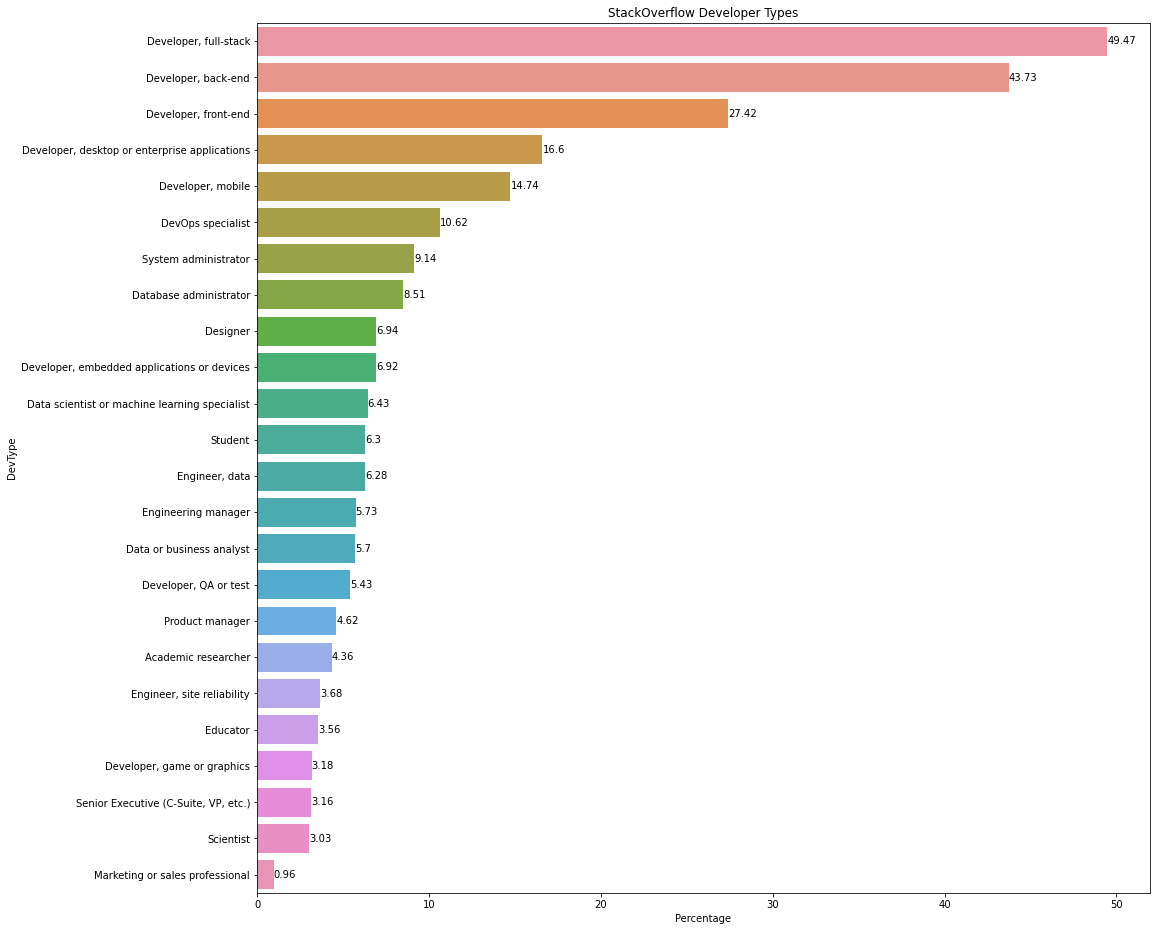

In [203]:
# Draw a horizontal bar chart of Developer Types in Percentage represented in the survey 
plt.figure(figsize=(16, 16))
ax = sns.barplot(data=srt_devTyp_df, x='Percentage', y='DevType')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Developer Types");

### Breakup of Developer Types in US

In [204]:
#Review the all_devTyp dataframe
all_devTyp_df 

,Country,DevType
0,Slovakia,"Developer, mobile"
1,Austria,"Developer, front-end"
2,United Kingdom of Great Britain and Northern I...,"Developer, desktop or enterprise applications"
3,United Kingdom of Great Britain and Northern I...,"Developer, full-stack"
4,United Kingdom of Great Britain and Northern I...,"Engineer, data"
...,...,...
174077,United States of America,DevOps specialist
174078,Canada,"Developer, back-end"
174079,Brazil,"Developer, front-end"
174080,Brazil,"Developer, full-stack"


In [205]:
# Create a Groupby object from the all devType dataframe and extract the US Country records into another dataframe
us_devTyp_df = all_devTyp_df.groupby('Country').get_group('United States of America')
us_devTyp_df

,Country,DevType
49,United States of America,"Developer, embedded applications or devices"
50,United States of America,"Developer, back-end"
71,United States of America,Data or business analyst
72,United States of America,"Developer, front-end"
73,United States of America,"Developer, desktop or enterprise applications"
...,...,...
174063,United States of America,Engineering manager
174064,United States of America,System administrator
174074,United States of America,"Developer, back-end"
174076,United States of America,Data scientist or machine learning specialist


In [206]:
# Create a dataframe with the sorted Value counts in the DevType column
srt2_devTyp_df = pd.DataFrame(us_devTyp_df.DevType.value_counts()).reset_index()
srt2_devTyp_df
# We need to fix the column headings

,index,DevType
0,"Developer, full-stack",6408
1,"Developer, back-end",5227
2,"Developer, front-end",3102
3,"Developer, desktop or enterprise applications",2168
4,DevOps specialist,1510
5,System administrator,1297
6,"Developer, mobile",1250
7,Database administrator,1202
8,Designer,1015
9,"Engineer, data",996


In [207]:
# Rename the columns of the srt_devTyp_df dataframe
srt2_devTyp_df.columns = ['DevType', 'Responses']
srt2_devTyp_df

,DevType,Responses
0,"Developer, full-stack",6408
1,"Developer, back-end",5227
2,"Developer, front-end",3102
3,"Developer, desktop or enterprise applications",2168
4,DevOps specialist,1510
5,System administrator,1297
6,"Developer, mobile",1250
7,Database administrator,1202
8,Designer,1015
9,"Engineer, data",996


In [208]:
# Add a percentage column to the srt2_devTyp_df dataframe
srt2_devTyp_df['Percentage'] = round(srt2_devTyp_df.Responses / us_devType_responses * 100, 2)
srt2_devTyp_df

,DevType,Responses,Percentage
0,"Developer, full-stack",6408,50.27
1,"Developer, back-end",5227,41.00
2,"Developer, front-end",3102,24.33
3,"Developer, desktop or enterprise applications",2168,17.01
4,DevOps specialist,1510,11.84
5,System administrator,1297,10.17
6,"Developer, mobile",1250,9.81
7,Database administrator,1202,9.43
8,Designer,1015,7.96
9,"Engineer, data",996,7.81


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#developer-roles-dev-type-us" target = "_blank">here</a> to verify with StackOverflow

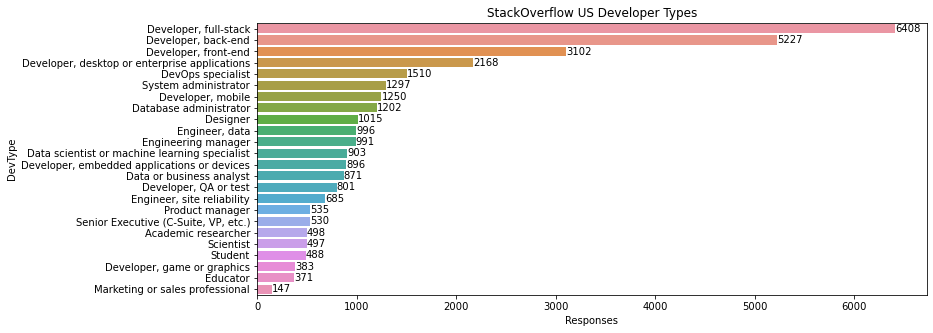

In [215]:
# Draw a horizontal bar chart of US Developer Types represented in the survey
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=srt2_devTyp_df, x='Responses', y='DevType')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow US Developer Types");

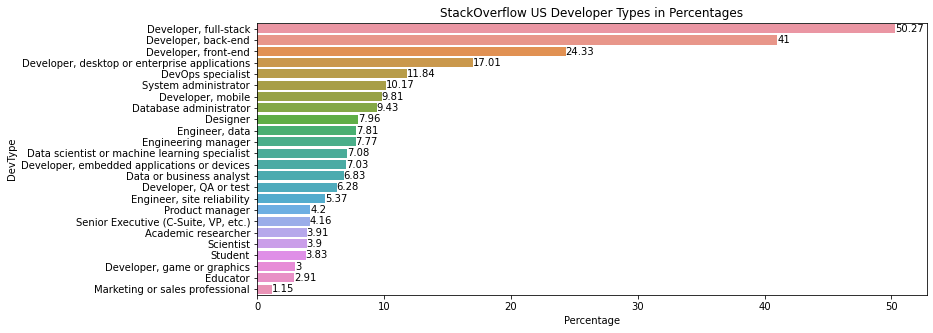

In [216]:
# Draw a horizontal bar chart of US Developer Types in Percentages represented in the survey
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=srt2_devTyp_df, x='Percentage', y='DevType')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow US Developer Types in Percentages");
# The percentage-wise breakups across developer types are about the same, within US and in the whole world.

## d) Education

### Educational attainment

In [217]:
# Look in the survey pdf page# 4 under Education, work, and career
# Copy the relevant question "How did you learn to code?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'Which of the following best describes the highest level of formal education that you’ve completed?'
search_str
# We need to find which column in the results dataset contains the answer

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [218]:
# call the look_where function with the search string 
look_where(search_str)
# We need to work with the 'EdLevel' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [219]:
# We also need the profession of the respondents to understand profession-wise Education level
# Look in the survey pdf page# 2 under Basic Information
# Copy the relevant question "Which of the following options best describes you today?" into the clipboard buffer
# Assign the copied text to the search string
search_str = 'Which of the following options best describes you today?'
search_str
# We need to find which column in the results dataset contains the answer

'Which of the following options best describes you today?'

In [220]:
# call the look_where function with the search string 
look_where(search_str)
# We also need to work with the 'MainBranch' column in the survey dataframe 

,qid,qname,question,force_resp,type,selector
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR


In [221]:
# Extract the MainBranch and EdLevel columns in the survey dataframe to a separate dataframe
edu_df = survey_df[['MainBranch','EdLevel']].copy()
edu_df
# Since this question is not force-response True, we need to deal with invalid responses in EdLevel column

,MainBranch,EdLevel
0,I am a developer by profession,"Secondary school (e.g. American high school, G..."
1,I am a student who is learning to code,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,"I am not primarily a developer, but I write co...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
4,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
...,...,...
83434,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
83435,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
83436,I am a developer by profession,"Secondary school (e.g. American high school, G..."
83437,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [222]:
# Check if any nulls exist in the edu dataframe
edu_df.isna().sum()
# the EdLevel column has 313 null values

MainBranch      0
EdLevel       313
dtype: int64

In [224]:
# We will plug in 'Undisclosed' for null EdLevel values
edu_df.EdLevel.fillna('Undisclosed', inplace=True)

In [225]:
# Check if any nulls exist in the edu dataframe
edu_df.isna().sum()
# the edu dataframe does not have null values anymore

MainBranch    0
EdLevel       0
dtype: int64

In [226]:
# Calculate the number of professional Developers
professional_responses = edu_df[edu_df.MainBranch == 'I am a developer by profession'].shape[0]
professional_responses

58153

In [227]:
# Check the education level breakups
edu_df.EdLevel.value_counts()
# Note the 313 respondents who did not disclose their education level

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Undisclosed                                                                             313
Name: EdLevel, dtype: int64

In [228]:
# Create a dataframe with the sorted Value counts in the EdLevel column
edLvl_df = pd.DataFrame(edu_df.EdLevel.value_counts()).reset_index()
edLvl_df
# We need to fix the column headings

,index,EdLevel
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35357
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17512
2,Some college/university study without earning ...,10589
3,"Secondary school (e.g. American high school, G...",9534
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",2567
5,Primary/elementary school,2479
6,"Associate degree (A.A., A.S., etc.)",2231
7,Something else,1601
8,"Professional degree (JD, MD, etc.)",1256
9,Undisclosed,313


In [229]:
# Rename the columns of the edLvl dataframe
edLvl_df.columns = ['EdLevel', 'Responses']
edLvl_df

,EdLevel,Responses
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35357
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17512
2,Some college/university study without earning ...,10589
3,"Secondary school (e.g. American high school, G...",9534
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",2567
5,Primary/elementary school,2479
6,"Associate degree (A.A., A.S., etc.)",2231
7,Something else,1601
8,"Professional degree (JD, MD, etc.)",1256
9,Undisclosed,313


In [230]:
# Add a percentage column to the EdLevel dataframe
edLvl_df['Percentage'] = round(edLvl_df.Responses / sum(edLvl_df.Responses) * 100, 2)
edLvl_df

,EdLevel,Responses,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35357,42.37
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17512,20.99
2,Some college/university study without earning ...,10589,12.69
3,"Secondary school (e.g. American high school, G...",9534,11.43
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",2567,3.08
5,Primary/elementary school,2479,2.97
6,"Associate degree (A.A., A.S., etc.)",2231,2.67
7,Something else,1601,1.92
8,"Professional degree (JD, MD, etc.)",1256,1.51
9,Undisclosed,313,0.38


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#education-ed-level" target = "_blank">here</a> to verify with StackOverflow

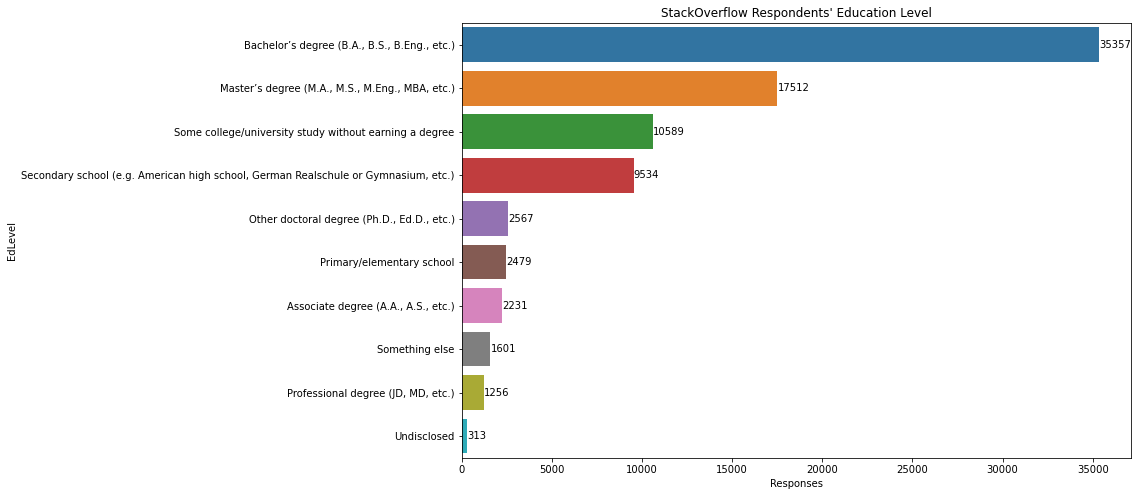

In [231]:
# Draw a horizontal bar chart of the Education Level represented in the survey by responses
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=edLvl_df.head(10), x='Responses', y='EdLevel')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondents' Education Level");

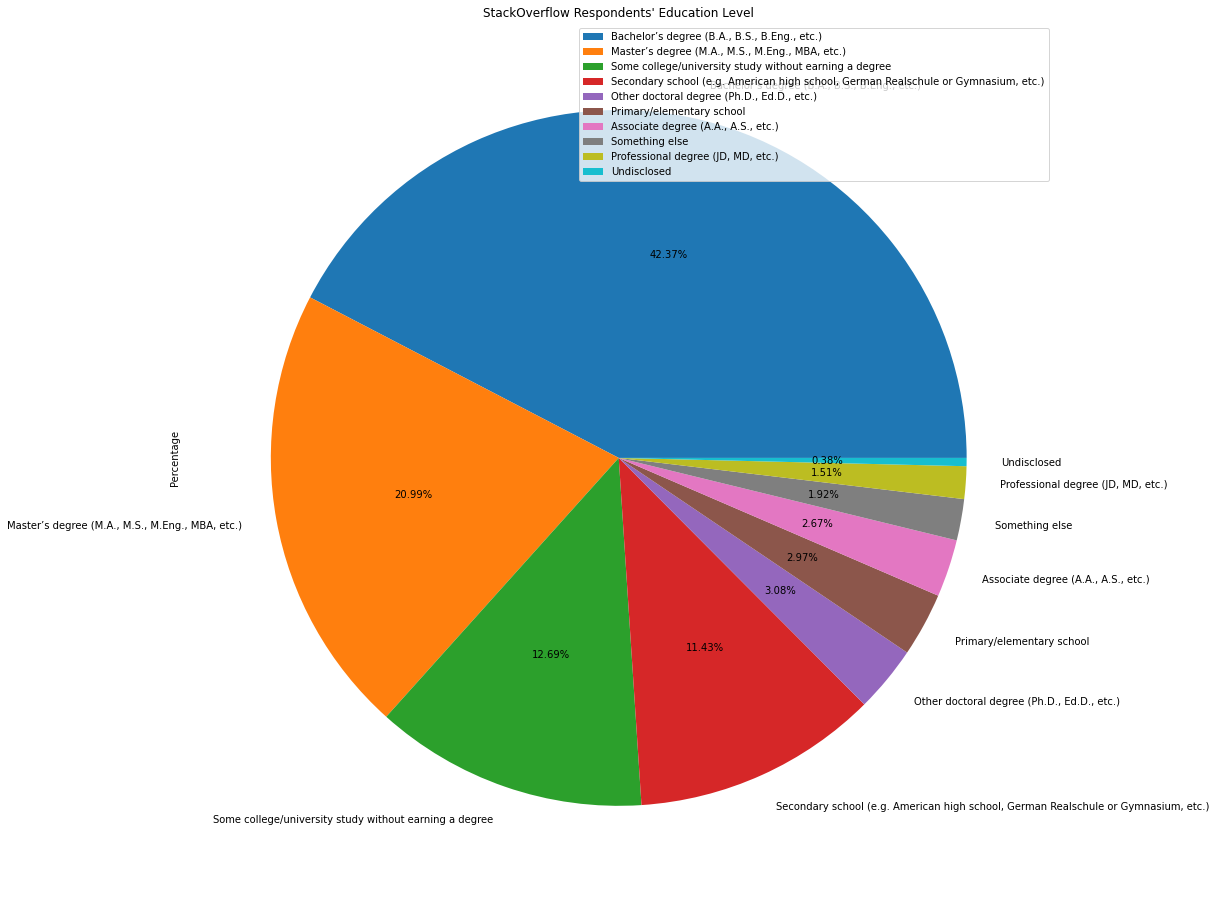

In [232]:
# Draw a pie chart of the Education Level represented in the survey by percentages
edLvl_pie_df = edLvl_df.set_index('EdLevel')
edLvl_pie_df.plot.pie(figsize=(16, 16), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Respondents' Education Level");
# Most of the StackOverflow survey respondents hold Masters or Bachelor degrees.

### Education Levels among Professional developers

In [233]:
# Create a Groupby object from the edu dataframe and extract the professional developer records into another dataframe
prof_edu_df = edu_df.groupby('MainBranch').get_group('I am a developer by profession')
prof_edu_df

,MainBranch,EdLevel
0,I am a developer by profession,"Secondary school (e.g. American high school, G..."
3,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
4,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
8,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
9,I am a developer by profession,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
...,...,...
83434,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
83435,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
83436,I am a developer by profession,"Secondary school (e.g. American high school, G..."
83437,I am a developer by profession,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [234]:
# Check the education level breakups
prof_edu_df.EdLevel.value_counts()
# Note the 122 professional developers who did not disclose their education level

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28691
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       14285
Some college/university study without earning a degree                                 6941
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2910
Associate degree (A.A., A.S., etc.)                                                    1611
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1502
Professional degree (JD, MD, etc.)                                                      947
Something else                                                                          724
Primary/elementary school                                                               420
Undisclosed                                                                             122
Name: EdLevel, dtype: int64

In [235]:
# Create a dataframe with the sorted Value counts in the EdLevel column
prof_edLvl_df = pd.DataFrame(prof_edu_df.EdLevel.value_counts()).reset_index()
prof_edLvl_df
# We need to fix the column headings

,index,EdLevel
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",28691
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14285
2,Some college/university study without earning ...,6941
3,"Secondary school (e.g. American high school, G...",2910
4,"Associate degree (A.A., A.S., etc.)",1611
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1502
6,"Professional degree (JD, MD, etc.)",947
7,Something else,724
8,Primary/elementary school,420
9,Undisclosed,122


In [236]:
# Rename the columns of the prof edLvl dataframe
prof_edLvl_df.columns = ['EdLevel', 'Responses']
prof_edLvl_df

,EdLevel,Responses
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",28691
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14285
2,Some college/university study without earning ...,6941
3,"Secondary school (e.g. American high school, G...",2910
4,"Associate degree (A.A., A.S., etc.)",1611
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1502
6,"Professional degree (JD, MD, etc.)",947
7,Something else,724
8,Primary/elementary school,420
9,Undisclosed,122


In [237]:
# Add a percentage column to the prof EdLevel dataframe
prof_edLvl_df['Percentage'] = round(prof_edLvl_df.Responses / sum(prof_edLvl_df.Responses) * 100, 2)
prof_edLvl_df

,EdLevel,Responses,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",28691,49.34
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14285,24.56
2,Some college/university study without earning ...,6941,11.94
3,"Secondary school (e.g. American high school, G...",2910,5.00
4,"Associate degree (A.A., A.S., etc.)",1611,2.77
5,"Other doctoral degree (Ph.D., Ed.D., etc.)",1502,2.58
6,"Professional degree (JD, MD, etc.)",947,1.63
7,Something else,724,1.24
8,Primary/elementary school,420,0.72
9,Undisclosed,122,0.21


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#education-ed-level-prof" target = "_blank">here</a> to verify with StackOverflow

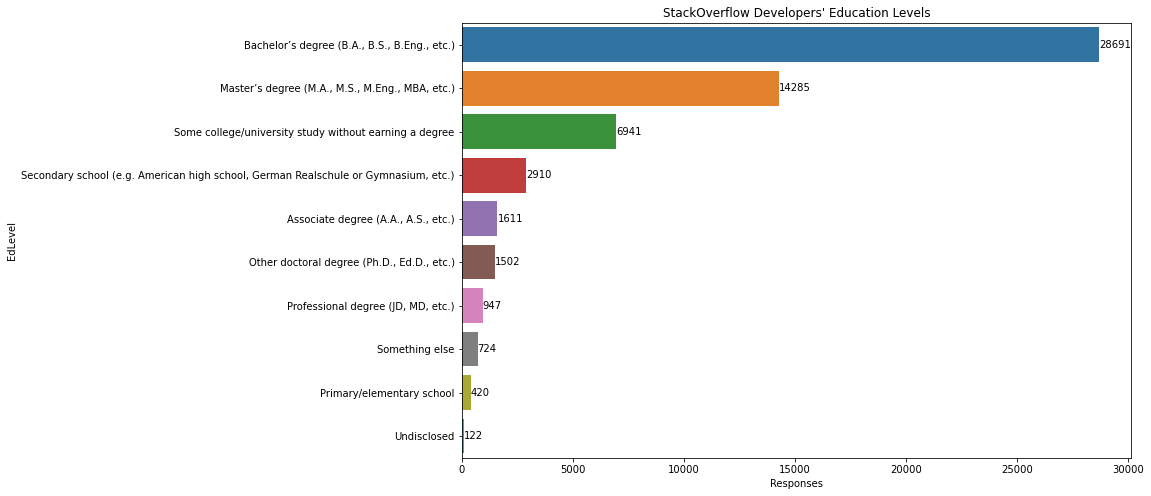

In [238]:
# Draw a horizontal bar chart of the Education Level represented by professional developers
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=prof_edLvl_df.head(10), x='Responses', y='EdLevel')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Developers' Education Levels");

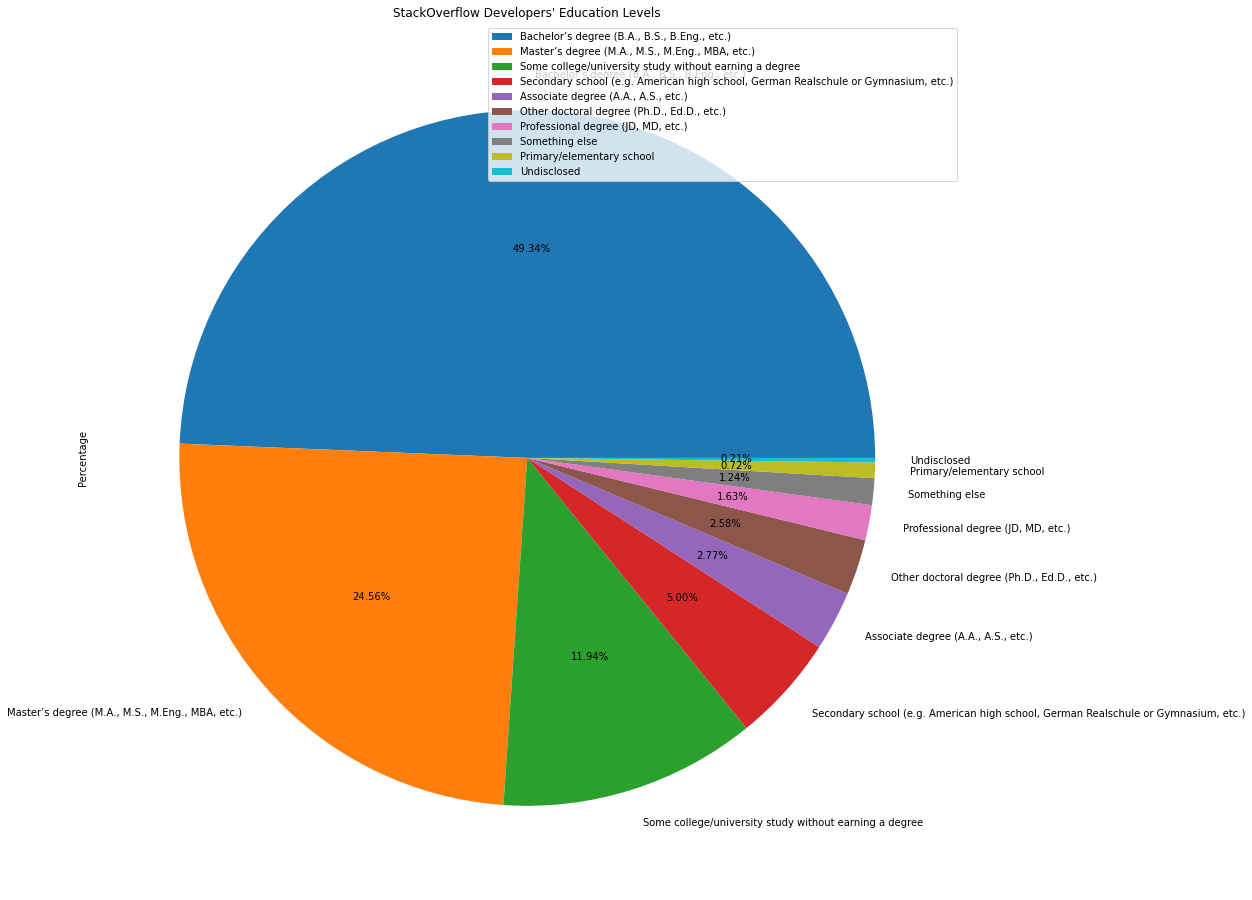

In [239]:
# Draw a pie chart of the Education Level represented by professional developers in percentages
prof_edLvl_pie_df = prof_edLvl_df.set_index('EdLevel')
prof_edLvl_pie_df.plot.pie(figsize=(16, 16), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Developers' Education Levels");
# 3/4th of StackOverflow respondent developers hold Masters or Bachelor degrees.

## e) Demographics

### Age

In [240]:
# Extract the Age and MainBranch columns in the survey dataframe to a separate dataframe
age_df = survey_df[['Age','MainBranch']].copy()
age_df.dropna(subset = ['Age'], inplace=True)
age_df
# Since this question is not force-response True, we have dropped the invalid responses in Age column

,Age,MainBranch
0,25-34 years old,I am a developer by profession
1,18-24 years old,I am a student who is learning to code
2,18-24 years old,"I am not primarily a developer, but I write co..."
3,35-44 years old,I am a developer by profession
4,25-34 years old,I am a developer by profession
...,...,...
83434,25-34 years old,I am a developer by profession
83435,18-24 years old,I am a developer by profession
83436,25-34 years old,I am a developer by profession
83437,25-34 years old,I am a developer by profession


In [241]:
# Check if any nulls exist in the age dataframe
age_df.isna().sum()
# the Age dataframe does not have any null values

Age           0
MainBranch    0
dtype: int64

In [242]:
# Create a dataframe with the sorted Value counts in the Age column
ageLvl_df = pd.DataFrame(age_df.Age.value_counts()).reset_index()
ageLvl_df
# We need to fix the column headings

,index,Age
0,25-34 years old,32568
1,18-24 years old,20993
2,35-44 years old,15183
3,45-54 years old,5472
4,Under 18 years old,5376
5,55-64 years old,1819
6,Prefer not to say,575
7,65 years or older,421


In [243]:
# Rename the columns of the age dataframe
ageLvl_df.columns = ['Age', 'Responses']
ageLvl_df

,Age,Responses
0,25-34 years old,32568
1,18-24 years old,20993
2,35-44 years old,15183
3,45-54 years old,5472
4,Under 18 years old,5376
5,55-64 years old,1819
6,Prefer not to say,575
7,65 years or older,421


In [244]:
# Add a percentage column to the age dataframe
ageLvl_df['Percentage'] = round(ageLvl_df.Responses / sum(ageLvl_df.Responses) * 100, 2)
ageLvl_df

,Age,Responses,Percentage
0,25-34 years old,32568,39.52
1,18-24 years old,20993,25.47
2,35-44 years old,15183,18.42
3,45-54 years old,5472,6.64
4,Under 18 years old,5376,6.52
5,55-64 years old,1819,2.21
6,Prefer not to say,575,0.70
7,65 years or older,421,0.51


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#demographics-age" target = "_blank">here</a> to verify with StackOverflow

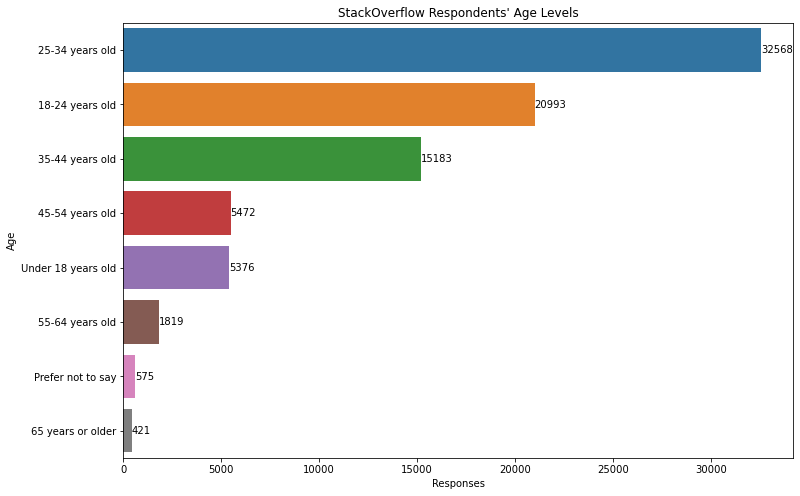

In [245]:
# Draw a horizontal bar chart of the Age Level represented by respondents
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=ageLvl_df, x='Responses', y='Age')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Respondents' Age Levels");

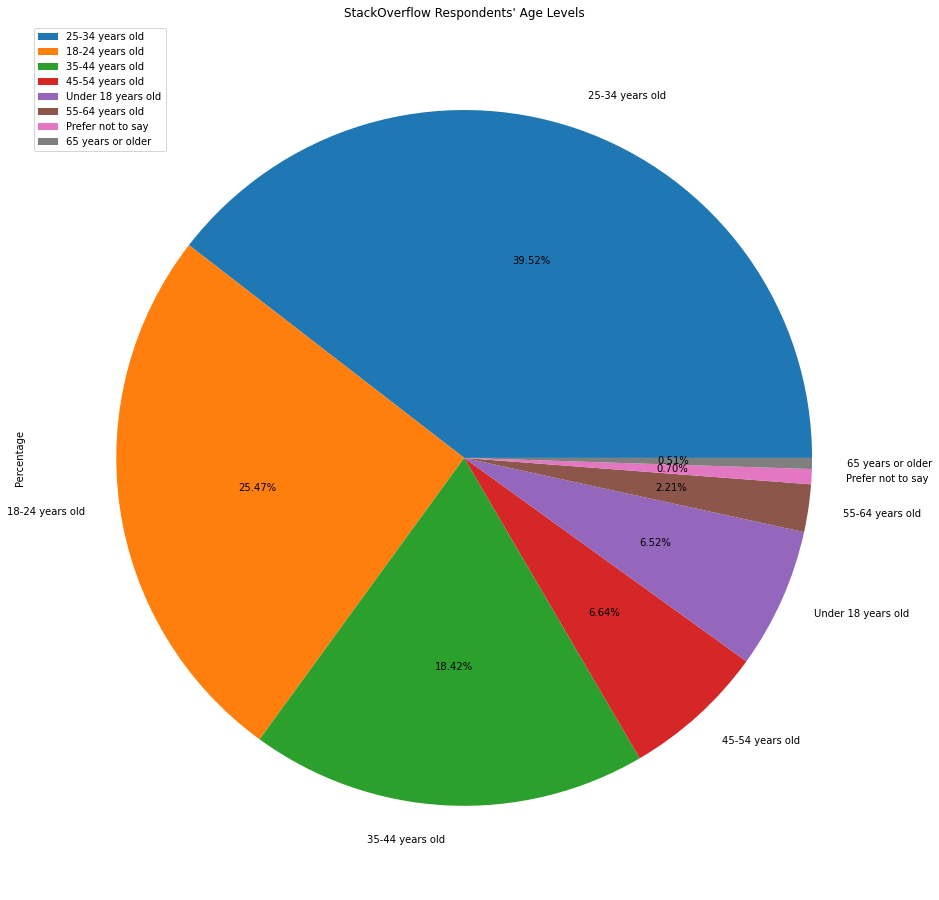

In [246]:
# Draw a pie chart of the Age Levels represented by respondents in percentages
ageLvl_pie_df = ageLvl_df.set_index('Age')
ageLvl_pie_df.plot.pie(figsize=(16, 16), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Respondents' Age Levels");
# Almost 3/4th of StackOverflow respondents are below 35 years of age.

### Age among Professional developers

In [247]:
# Create a Groupby object from the age dataframe and extract the professional developer records into another dataframe
prof_age_df = age_df.groupby('MainBranch').get_group('I am a developer by profession')
prof_age_df

,Age,MainBranch
0,25-34 years old,I am a developer by profession
3,35-44 years old,I am a developer by profession
4,25-34 years old,I am a developer by profession
8,25-34 years old,I am a developer by profession
9,25-34 years old,I am a developer by profession
...,...,...
83434,25-34 years old,I am a developer by profession
83435,18-24 years old,I am a developer by profession
83436,25-34 years old,I am a developer by profession
83437,25-34 years old,I am a developer by profession


In [248]:
# Create a dataframe with the sorted Value counts in the Age column
prof_ageLvl_df = pd.DataFrame(prof_age_df.Age.value_counts()).reset_index()
prof_ageLvl_df
# We need to fix the column headings

,index,Age
0,25-34 years old,27874
1,35-44 years old,12497
2,18-24 years old,10987
3,45-54 years old,4210
4,55-64 years old,1294
5,Under 18 years old,322
6,65 years or older,201
7,Prefer not to say,188


In [249]:
# Rename the columns of the prof ageLvl dataframe
prof_ageLvl_df.columns = ['Age', 'Responses']
prof_ageLvl_df

,Age,Responses
0,25-34 years old,27874
1,35-44 years old,12497
2,18-24 years old,10987
3,45-54 years old,4210
4,55-64 years old,1294
5,Under 18 years old,322
6,65 years or older,201
7,Prefer not to say,188


In [250]:
# Add a percentage column to the prof ageLevel dataframe
prof_ageLvl_df['Percentage'] = round(prof_ageLvl_df.Responses / sum(prof_ageLvl_df.Responses) * 100, 2)
prof_ageLvl_df

,Age,Responses,Percentage
0,25-34 years old,27874,48.42
1,35-44 years old,12497,21.71
2,18-24 years old,10987,19.08
3,45-54 years old,4210,7.31
4,55-64 years old,1294,2.25
5,Under 18 years old,322,0.56
6,65 years or older,201,0.35
7,Prefer not to say,188,0.33


## Verify with StackOverflow
Click <a href= "https://insights.stackoverflow.com/survey/2021#demographics-age-prof" target = "_blank">here</a> to verify with StackOverflow

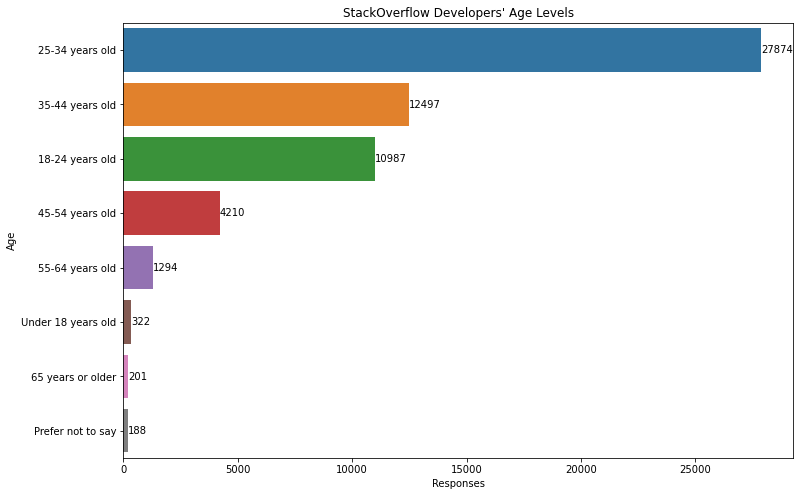

In [251]:
# Draw a horizontal bar chart of the Age Level represented by professional developers
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=prof_ageLvl_df, x='Responses', y='Age')
for i in ax.containers:
    ax.bar_label(i)
plt.title("StackOverflow Developers' Age Levels");

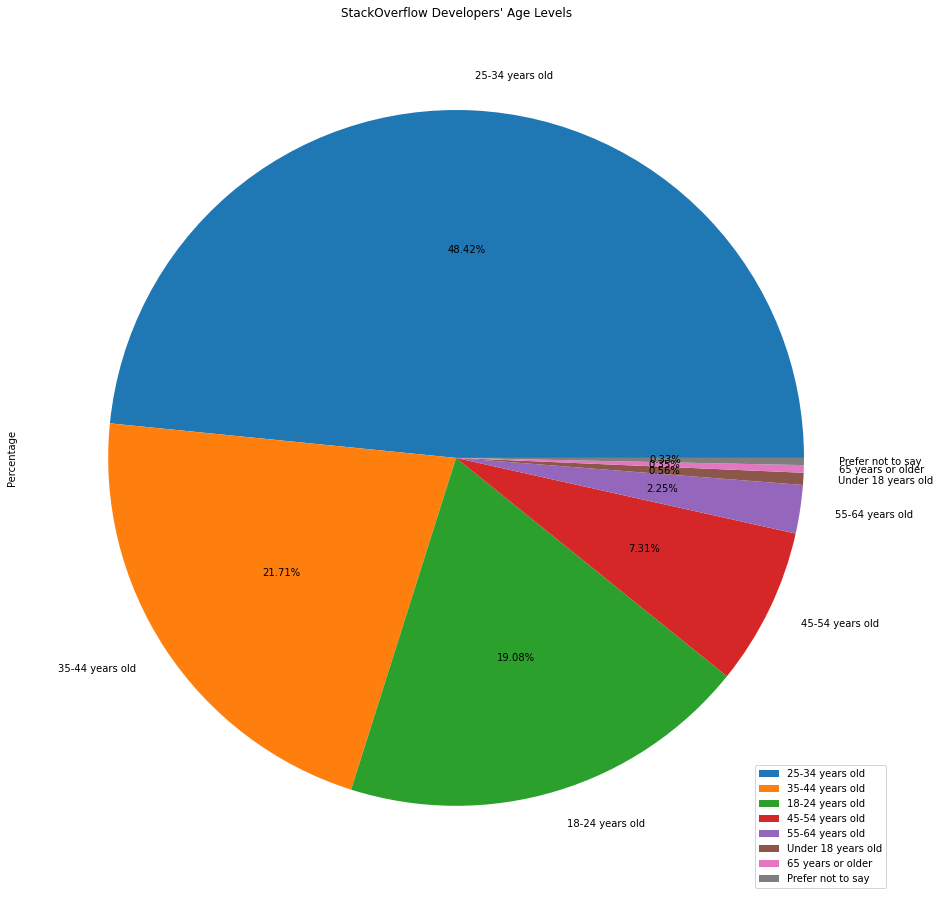

In [252]:
# Draw a pie chart of the Age Levels represented by professional developers in percentages
prof_ageLvl_pie_df = prof_ageLvl_df.set_index('Age')
prof_ageLvl_pie_df.plot.pie(figsize=(16, 16), y='Percentage', autopct='%.2f%%')
plt.title("StackOverflow Developers' Age Levels");
# Almost 3/4th of StackOverflow professional developers are below 35 years of age.

## To create a yml file with list of packages in the current environment:

In [253]:
# Capture the current conda environment name and the packages in it 
!conda env export > environment_file.yml

In [254]:
# Review the environment file
!type environment_file.yml
# The environment file has the environment name and the requisite package names and their versions

name: survey-env
channels:
  - defaults
dependencies:
  - argon2-cffi=21.3.0=pyhd3eb1b0_0
  - argon2-cffi-bindings=21.2.0=py38h2bbff1b_0
  - asttokens=2.0.5=pyhd3eb1b0_0
  - attrs=21.4.0=pyhd3eb1b0_0
  - backcall=0.2.0=pyhd3eb1b0_0
  - blas=1.0=mkl
  - bleach=4.1.0=pyhd3eb1b0_0
  - bottleneck=1.3.4=py38h080aedc_0
  - brotli=1.0.9=ha925a31_2
  - ca-certificates=2022.3.29=haa95532_0
  - certifi=2021.10.8=py38haa95532_2
  - cffi=1.15.0=py38h2bbff1b_1
  - colorama=0.4.4=pyhd3eb1b0_0
  - cycler=0.11.0=pyhd3eb1b0_0
  - debugpy=1.5.1=py38hd77b12b_0
  - decorator=5.1.1=pyhd3eb1b0_0
  - defusedxml=0.7.1=pyhd3eb1b0_0
  - entrypoints=0.3=py38_0
  - et_xmlfile=1.1.0=py38haa95532_0
  - executing=0.8.3=pyhd3eb1b0_0
  - fonttools=4.25.0=pyhd3eb1b0_0
  - freetype=2.10.4=hd328e21_0
  - icc_rt=2019.0.0=h0cc432a_1
  - icu=58.2=ha925a31_3
  - importlib-metadata=4.11.3=py38haa95532_0
  - importlib_metadata=4.11.3=hd3eb1b0_0
  - intel-openmp=2021.4.0=haa95532_3556
  - ipykernel=6.9.1=py38haa95532_0
  - ipyt

## To create a new conda environment with packages installed from a yml file:
1. Ensure that the conda base environment is active
2. Ensure correct destination conda environment name in the 'name:' section (first line) of the yml file
3. Run the Ananconda powershell command:  \
        conda env create -f environment_file.yml 

# Download this Project notebook, Data files and Environment setup file

Right-click and select 'Save link as' to download <a href="survey-data-analysis.ipynb">this notebook</a>

Click <a href="https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip">here</a> to go and download the Stack Overflow survey dataset

Click <a href="environment_file.yml" target="_blank">here</a> to download the anaconda environment setup yml file